# Healthcare Data Set

**We will explore the Healthcare data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**

- **Removing duplicates**
- **Missing value treatment**
- **Outlier Treatment**
- **Scaling( Numerical Variables)**
- **Data transformation**
- **PCA for multicollinearity**
- **Encoding Categorical variables( Dummy Variables)**
- **Univariate Analysis**
- **Bivariate Analysis**
- **Multivariate Analysis**

**As a first step, we will import all the necessary libraries that we think we will requiring to perform the EDA.**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the data set

**We will  be loading the EDA cars excel file using pandas. For this we will be using read_excel file.**

In [2]:
data = pd.read_csv('Data.csv')

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [3]:
pd.options.display.max_columns = None
data.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  other_major_decs_history  Gender  \
0             4866   28                   1                         0    Male   
1             6411   50                   0                         0    Male   
2             4509   68                   0                         0  Female   
3             6214   51                   0                         0  Female   
4             4938   44                   0                         1    Male   

   avg_glucose_level   bmi   smoking_status  Year_last_admitted   Location  \
0                 97  31.2          Unknown                 NaN    Chennai   
1                212  34.2  formerly smoked                 NaN     Jaipur   
2                166  40.4  formerly smoked                 NaN     Jaipur   
3                109  22.9          Unknown                 NaN    Chennai   
4                118  26.5     never smoked              2004.0  Bangalore   

   weight covered_by_any_other_company Alcohol  exercise  \
0      67                            N    Rare  Moderate   
1      58                            N    Rare  Moderate   
2      73                            N   Daily   Extreme   
3      71                            Y    Rare        No   
4      74                            N      No   Extreme   

   weight_change_in_last_one_year  fat_percentage  insurance_cost  
0                               1              25           20978  
1                               3              27            6170  
2                               0              32           28382  
3                               3              37           27148  
4                               0              34           29616

In [4]:
data.tail()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  \
24995        225 to 250             5614   22                   0   
24996        200 to 225             4719   58                   0   
24997        150 to 175             5624   34                   0   
24998        225 to 250            10777   27                   0   
24999        150 to 175             5882   22                   1   

       other_major_decs_history Gender  avg_glucose_level   bmi  \
24995                         0   Male                145  36.1   
24996                         0   Male                134  31.3   
24997                         1   Male                151   NaN   
24998                         0   Male                 66  26.6   
24999                         0   Male                245  41.6   

        smoking_status  Year_last_admitted     Location  weight  \
24995           smokes              2000.0       Kanpur      79   
24996     never smoked              2009.0       Kanpur      66   
24997          Unknown                 NaN  Bhubaneswar      76   
24998          Unknown                 NaN        Surat      74   
24999  formerly smoked              2014.0      Chennai      57   

      covered_by_any_other_company Alcohol  exercise  \
24995                            Y    Rare  Moderate   
24996                            N    Rare  Moderate   
24997                            N    Rare  Moderate   
24998                            N    Rare  Moderate   
24999                            N      No        No   

       weight_change_in_last_one_year  fat_percentage  insurance_cost  
24995                               4              40           39488  
24996                               2              28           14808  
24997                               1              35           33318  
24998                               0              40           30850  
24999                               4              21            6170

**head function will tell you the top records in the data set. By default python shows you only top 5 records.**

In [5]:
data.shape

(25000, 24)

In [6]:
print("no. of rows: ",data.shape[0], "\n""no. of columns: ",data.shape[1]) # shape

no. of rows:  25000 
no. of columns:  24


**Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. This data set has 25000 observations and 24 variables in the data set.**

In [7]:
data.info() # retrieving the list of fields along with their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [8]:
df1 = data.rename(columns = {'regular_checkup_lasy_year': 'regular_checkup_last_year'}, inplace = False)

In [9]:
df1.head(10)

applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   
5          5005                           8                          0   
6          5006                           8                          0   
7          5007                           1                          0   
8          5008                           8                          1   
9          5009                           4                          3   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   
5                 0    Salried                           2        225 to 250   
6                 0    Student                           4        125 to 150   
7                 0    Student                           4        150 to 175   
8                 0    Salried                           4        125 to 150   
9                 0    Salried                           3        125 to 150   

   daily_avg_steps  age  heart_decs_history  other_major_decs_history  Gender  \
0             4866   28                   1                         0    Male   
1             6411   50                   0                         0    Male   
2             4509   68                   0                         0  Female   
3             6214   51                   0                         0  Female   
4             4938   44                   0                         1    Male   
5             5306   39                   0                         0    Male   
6             4676   40                   0                         0    Male   
7             7448   46                   0                         0  Female   
8             5632   45                   0                         0    Male   
9             4130   38                   0                         0  Female   

   avg_glucose_level   bmi   smoking_status  Year_last_admitted     Location  \
0                 97  31.2          Unknown                 NaN      Chennai   
1                212  34.2  formerly smoked                 NaN       Jaipur   
2                166  40.4  formerly smoked                 NaN       Jaipur   
3                109  22.9          Unknown                 NaN      Chennai   
4                118  26.5     never smoked              2004.0    Bangalore   
5                155  38.0          Unknown              2003.0  Bhubaneswar   
6                 80  28.7     never smoked              2004.0     Guwahati   
7                245  26.0           smokes                 NaN      Chennai   
8                126  24.4           smokes              2007.0       Mumbai   
9                 83  46.0  formerly smoked                 NaN       Nagpur   

   weight covered_by_any_other_company Alcohol  exercise  \
0      67                            N    Rare  Moderate   
1      58                            N    Rare  Moderate   
2      73                            N   Daily   Extreme   
3      71                            Y    Rare        No   
4      74                            N      No   Extreme   
5      78                            Y    Rare        No   
6      81                            N      No  Moderate   
7      72                            N    Rare  Modera

**info() is used to check the Information about the data and the datatypes of each respective attributes.**

In [10]:
# Check for missing value in any column
df1.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_last_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [11]:
df1.describe()

applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
count  25000.000000                25000.000000               25000.000000   
mean   17499.500000                    4.089040                   0.773680   
std     7217.022701                    2.606612                   1.199449   
min     5000.000000                    0.000000                   0.000000   
25%    11249.750000                    2.000000                   0.000000   
50%    17499.500000                    4.000000                   0.000000   
75%    23749.250000                    6.000000                   1.000000   
max    29999.000000                    8.000000                   5.000000   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  \
count      25000.000000                25000.000000     25000.000000   
mean           0.081720                    3.104200      5215.889320   
std            0.273943                    1.141663      1053.179748   
min            0.000000                    0.000000      2034.000000   
25%            0.000000                    2.000000      4543.000000   
50%            0.000000                    3.000000      5089.000000   
75%            0.000000                    4.000000      5730.000000   
max            1.000000                   12.000000     11255.000000   

                age  heart_decs_history  other_major_decs_history  \
count  25000.000000        25000.000000              25000.000000   
mean      44.918320            0.054640                  0.098160   
std       16.107492            0.227281                  0.297537   
min       16.000000            0.000000                  0.000000   
25%       31.000000            0.000000                  0.000000   
50%       45.000000            0.000000                  0.000000   
75%       59.000000            0.000000                  0.000000   
max       74.000000            1.000000                  1.000000   

       avg_glucose_level           bmi  Year_last_admitted        weight  \
count       25000.000000  24010.000000        13119.000000  25000.000000   
mean          167.530000     31.393328         2003.892217     71.610480   
std            62.729712      7.876535            7.581521      9.325183   
min            57.000000     12.300000         1990.000000     52.000000   
25%           113.000000     26.100000         1997.000000     64.000000   
50%           168.000000     30.500000         2004.000000     72.000000   
75%           222.000000     35.600000         2010.000000     78.000000   
max           277.000000    100.600000         2018.000000     96.000000   

       weight_change_in_last_one_year  fat_percentage  insurance_cost  
count                    25000.000000    25000.000000    25000.000000  
mean                         2.517960       28.812280    27147.407680  
std                          1.690335        8.632382    14323.691832  
min                          0.000000       11.000000     2468.000000  
25%                          1.000000       21.000000    16042.000000  
50%                          3.000000       31.000000    27148.000000  
75%                          4.000000       36.000000    37020.000000  
max                          6.000000       42.000000    67870.000000

**The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.**

# Check for Duplicate records

In [12]:
# Check for duplicate data

dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [applicant_id, years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, Occupation, visited_doctor_last_1_year, cholesterol_level, daily_avg_steps, age, heart_decs_history, other_major_decs_history, Gender, avg_glucose_level, bmi, smoking_status, Year_last_admitted, Location, weight, covered_by_any_other_company, Alcohol, exercise, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

**We can  clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute. Initially it had 25000 records**

In [13]:
df1.shape

(25000, 24)

# Check for missing value

In [14]:
# Check for missing value in any column
df1.isnull().sum()[df1.isnull().sum()>0]

bmi                     990
Year_last_admitted    11881
dtype: int64

In [15]:
bmi = df1.bmi.isna().sum()
bmi

990

In [16]:
percentage_bmi = (bmi/len(df1)*100)
print(percentage_bmi)

3.9600000000000004


In [17]:
Year_last_admitted_missing = df1.Year_last_admitted.isna().sum()
Year_last_admitted_missing

11881

In [18]:
percentage = (Year_last_admitted_missing/len(df1)*100)
print(percentage)

47.524


#### Since the percentage of missing values in the column 'Year_last_admitted' is approximately half of the total values, we will have to decide whether to impute this column or not. Because approximately half of the data in this column will be artificially provided which will not give accurate models to be applied in real time data.
#### Thus we need to perform statistical analysis with the help of ANOVA between the columns 'Year_last_admitted' and 'insurance_cost' to find out the significance of this column in the dataset.

In [19]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [20]:
df1.Year_last_admitted = pd.Categorical(df1.Year_last_admitted)

In [21]:
formula = 'insurance_cost ~ C(Year_last_admitted)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

                            df        sum_sq       mean_sq            F  \
C(Year_last_admitted)     28.0  1.990551e+12  7.109109e+10  1169.434999   
Residual               13090.0  7.957538e+11  6.079097e+07          NaN   

                       PR(>F)  
C(Year_last_admitted)     0.0  
Residual                  NaN  


#### F-Distribution or F-Statistic is the ratio of MSB to MSW.

#### It gives the degree of how relatively greater the difference is 'between group means' (MSB) compared to 'within group variance' (MSW)
#### If the ratio is greater than expected, will mean that not all the group means are the same and the mean values are substantially different which is significant here.
#### Also with the correlation plot it is clear that year_last_admitted has highly negative correlation with the insurance_cost. Thus, we need to impute the null values in this column.

**We can see that we have various missing values in respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.**

- **Drop the missing values : In this case we drop the missing values from those variables. In case there are very few missing values you can drop those values.**

- **Impute with mean value : For numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values .i.e. outliers.**

- **Impute with median value : For numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use median approach.**

- **Impute with mode value : For categorical column, you can replace the missing values with mode values i.e the frequent ones.**

**In this exercise, we will replace the numerical columns with median values and for categorical columns we will replace the missing values with mode values.**

In [22]:
df1[df1.isnull().sum()[df1.isnull().sum()>0].index].dtypes

bmi                    float64
Year_last_admitted    category
dtype: object

In [23]:
## Let's convert Year_last_admitted into object type variable for further analysis
df1['Year_last_admitted']= df1['Year_last_admitted'].astype(object)

In [24]:
df1[df1.isnull().sum()[df1.isnull().sum()>0].index].dtypes

bmi                   float64
Year_last_admitted     object
dtype: object

In [25]:
# Since these features have outliers, we can use median to impute null values.

### Replacing NULL values in Numerical Columns using Median

In [26]:
median1=df1["bmi"].median()
df1["bmi"].replace(np.nan,median1,inplace=True)

### Replacing NULL values in Categorical Columns using most frequent value

In [27]:
df1.Year_last_admitted.value_counts()

2010.0    557
1995.0    538
2007.0    532
2002.0    520
2000.0    516
2013.0    516
1994.0    514
1998.0    514
1997.0    513
2009.0    512
1993.0    508
2001.0    507
2003.0    504
2008.0    503
1999.0    498
2014.0    496
2005.0    491
1996.0    487
2012.0    483
2004.0    481
2011.0    475
2006.0    472
2015.0    449
1992.0    382
2016.0    370
1991.0    276
2017.0    253
2018.0    130
1990.0    122
Name: Year_last_admitted, dtype: int64

In [28]:
df2 = df1.apply(lambda Year_last_admitted: Year_last_admitted.fillna(Year_last_admitted.value_counts().index[0]))
df2

applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
0              5000                           3                          1   
1              5001                           0                          0   
2              5002                           1                          0   
3              5003                           7                          4   
4              5004                           3                          1   
...             ...                         ...                        ...   
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
0                     1    Salried                           2   
1                     0    Student                           4   
2                     0   Business                           4   
3                     0   Business                           2   
4                     0    Student                           2   
...                 ...        ...                         ...   
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  \
0            125 to 150             4866   28                   1   
1            150 to 175             6411   50                   0   
2            200 to 225             4509   68                   0   
3            175 to 200             6214   51                   0   
4            150 to 175             4938   44                   0   
...                 ...              ...  ...                 ...   
24995        225 to 250             5614   22                   0   
24996        200 to 225             4719   58                   0   
24997        150 to 175             5624   34                   0   
24998        225 to 250            10777   27                   0   
24999        150 to 175             5882   22                   1   

       other_major_decs_history  Gender  avg_glucose_level   bmi  \
0                             0    Male                 97  31.2   
1                             0    Male                212  34.2   
2                             0  Female                166  40.4   
3                             0  Female                109  22.9   
4                             1    Male                118  26.5   
...                         ...     ...                ...   ...   
24995                         0    Male                145  36.1   
24996                         0    Male                134  31.3   
24997                         1    Male                151  30.5   
24998                         0    Male                 66  26.6   
24999                         0    Male                245  41.6   

        smoking_status  Year_last_admitted     Location  weight  \
0              Unknown              2010.0      Chennai      67   
1      formerly smoked              2010.0       Jaipur      58   
2      formerly smoked              2010.0       Jaipur      73   
3              Unknown              2010.0      Chennai      71   
4         never smoked              2004.0    Bangalore      74   
...                ...                 ...          ...     ...   
24995           smokes              2000.0       Kanpur      79   
24996     never smoked              2009.0       Kanpur      66   
24997          Unknown      

In [29]:
# Check for missing value in any column
df2.isnull().sum()

applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [30]:
df2.cholesterol_level.replace(to_replace='125 to 150', value='1', inplace=True)
df2.cholesterol_level.replace(to_replace='150 to 175', value='2', inplace=True)
df2.cholesterol_level.replace(to_replace='175 to 200', value='3', inplace=True)
df2.cholesterol_level.replace(to_replace='200 to 225', value='4', inplace=True)
df2.cholesterol_level.replace(to_replace='225 to 250', value='5', inplace=True)

In [31]:
df = df2.drop('applicant_id', axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

In [33]:
df.iloc[1001] # all the record of random single applicant

years_of_insurance_with_us                      6
regular_checkup_last_year                       0
adventure_sports                                1
Occupation                               Business
visited_doctor_last_1_year                      3
cholesterol_level                               3
daily_avg_steps                              3443
age                                            34
heart_decs_history                              1
other_major_decs_history                        0
Gender                                       Male
avg_glucose_level                              86
bmi                                          39.5
smoking_status                    formerly smoked
Year_last_admitted                         1993.0
Location                                Ahmedabad
weight                                         89
covered_by_any_other_company                    N
Alcohol                                        No
exercise                                  Extreme


In [34]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

OCCUPATION :  3
Salried      4811
Business    10020
Student     10169
Name: Occupation, dtype: int64


CHOLESTEROL_LEVEL :  5
5    2054
3    2881
4    2963
1    8339
2    8763
Name: cholesterol_level, dtype: int64


GENDER :  2
Female     8578
Male      16422
Name: Gender, dtype: int64


SMOKING_STATUS :  4
smokes             3867
formerly smoked    4329
Unknown            7555
never smoked       9249
Name: smoking_status, dtype: int64


LOCATION :  15
Surat          1589
Kolkata        1620
Pune           1622
Lucknow        1637
Mumbai         1658
Nagpur         1663
Kanpur         1664
Chennai        1669
Guwahati       1672
Ahmedabad      1677
Delhi          1680
Mangalore      1697
Bhubaneswar    1704
Jaipur         1706
Bangalore      1742
Name: Location, dtype: int64


COVERED_BY_ANY_OTHER_COMPANY :  2
Y     7582
N    17418
Name: covered_by_any_other_company, dtype: int64


ALCOHOL :  3
Daily     2707
No        8541
Rare     13752
Name: Alcohol, dtype: int64


EXERCISE :  3
No 

# Univariate Analysis

## Numerical Data

<AxesSubplot:xlabel='years_of_insurance_with_us', ylabel='Count'>

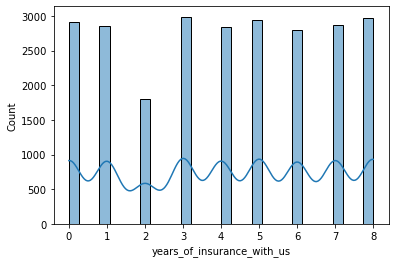

In [35]:
sns.histplot(df['years_of_insurance_with_us'], kde=True)  # histogram of insurance_cost

<AxesSubplot:xlabel='regular_checkup_last_year', ylabel='Count'>

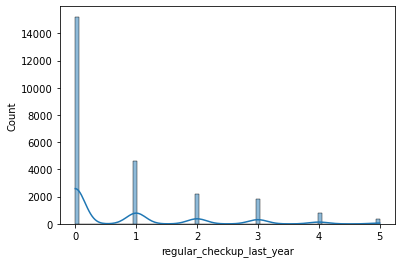

In [36]:
sns.histplot(df['regular_checkup_last_year'], kde=True)

<AxesSubplot:xlabel='adventure_sports', ylabel='Count'>

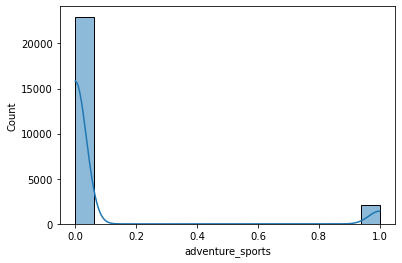

In [37]:
sns.histplot(df['adventure_sports'], kde=True)

<AxesSubplot:xlabel='visited_doctor_last_1_year', ylabel='Count'>

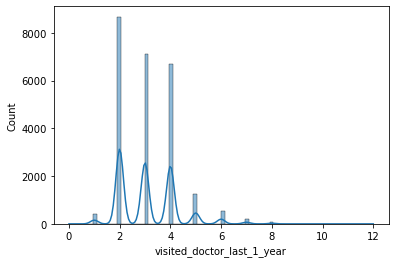

In [38]:
sns.histplot(df['visited_doctor_last_1_year'], kde=True)

<AxesSubplot:xlabel='daily_avg_steps', ylabel='Count'>

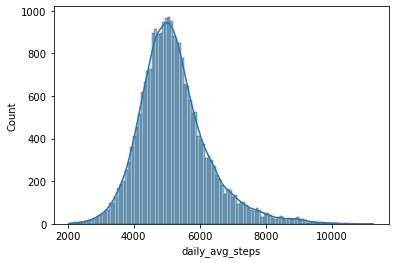

In [39]:
sns.histplot(df['daily_avg_steps'], kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

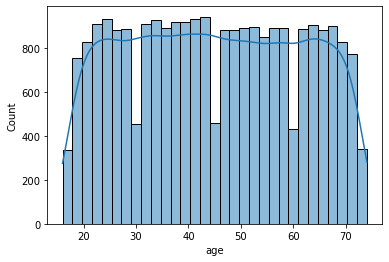

In [40]:
sns.histplot(df['age'], kde=True)

<AxesSubplot:xlabel='heart_decs_history', ylabel='Count'>

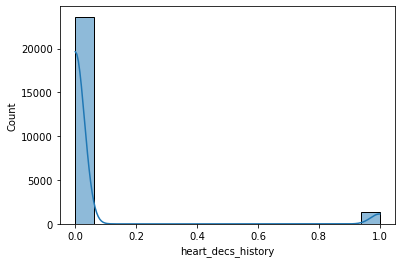

In [41]:
sns.histplot(df['heart_decs_history'], kde=True)

<AxesSubplot:xlabel='other_major_decs_history', ylabel='Count'>

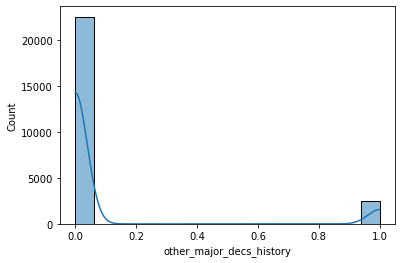

In [42]:
sns.histplot(df['other_major_decs_history'], kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

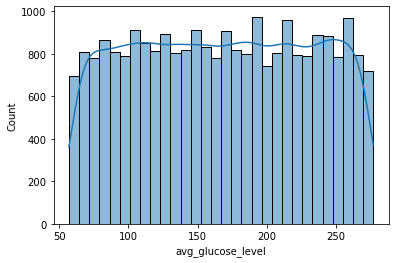

In [43]:
sns.histplot(df['avg_glucose_level'], kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

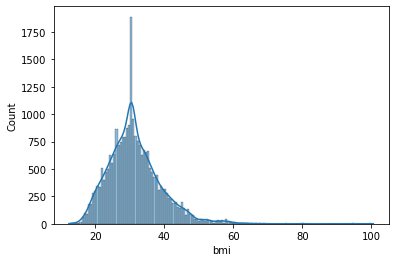

In [44]:
sns.histplot(df['bmi'], kde=True)

<AxesSubplot:xlabel='Year_last_admitted', ylabel='Count'>

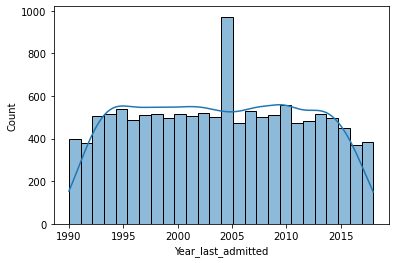

In [45]:
sns.histplot(df1['Year_last_admitted'], kde=True) # before replacing the null values

<AxesSubplot:xlabel='Year_last_admitted', ylabel='Count'>

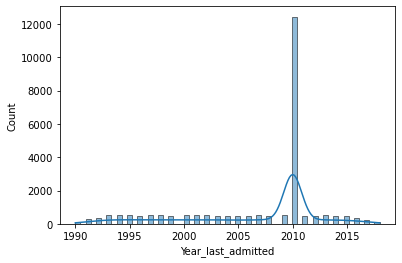

In [46]:
sns.histplot(df['Year_last_admitted'], kde=True) # after replacing the null values

<AxesSubplot:xlabel='weight', ylabel='Count'>

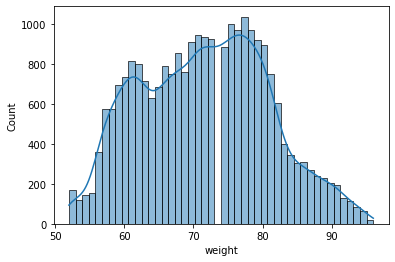

In [47]:
sns.histplot(df['weight'], kde=True)

<AxesSubplot:xlabel='weight_change_in_last_one_year', ylabel='Count'>

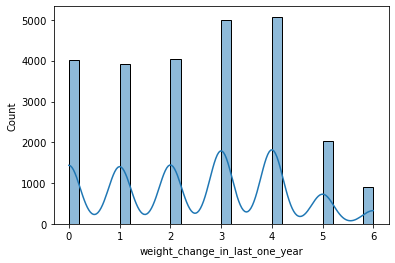

In [48]:
sns.histplot(df['weight_change_in_last_one_year'], kde=True)

<AxesSubplot:xlabel='fat_percentage', ylabel='Count'>

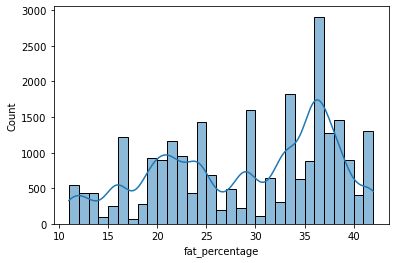

In [49]:
sns.histplot(df['fat_percentage'], kde=True)

<AxesSubplot:xlabel='insurance_cost', ylabel='Count'>

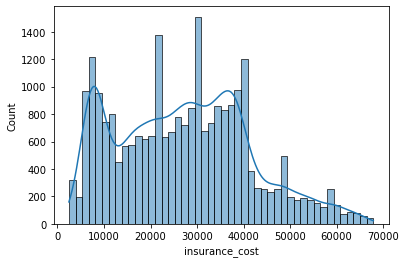

In [50]:
sns.histplot(df['insurance_cost'], kde=True)

In [51]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

YEARS_OF_INSURANCE_WITH_US :  9
2    1808
6    2804
4    2846
1    2856
7    2873
0    2912
5    2941
8    2970
3    2990
Name: years_of_insurance_with_us, dtype: int64


REGULAR_CHECKUP_LAST_YEAR :  6
5      348
4      777
3     1818
2     2198
1     4644
0    15215
Name: regular_checkup_last_year, dtype: int64


ADVENTURE_SPORTS :  2
1     2043
0    22957
Name: adventure_sports, dtype: int64


VISITED_DOCTOR_LAST_1_YEAR :  12
12       1
0        1
10       6
9       13
8       76
7      189
1      432
6      546
5     1265
4     6708
3     7094
2     8669
Name: visited_doctor_last_1_year, dtype: int64


DAILY_AVG_STEPS :  4914
10777     1
8680      1
8800      1
3225      1
6822      1
         ..
5017     21
5124     21
5051     22
4993     23
4870     25
Name: daily_avg_steps, Length: 4914, dtype: int64


AGE :  59
74    106
16    121
17    215
73    236
18    309
72    336
61    403
20    407
70    409
23    410
55    410
66    414
28    415
21    420
59    420
69    420
36    425

In [52]:
for column in df.columns:
    if df[column].dtype == 'float64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

BMI :  465
64.2       1
54.3       1
56.9       1
53.7       1
66.8       1
        ... 
30.6     171
28.1     181
30.7     186
29.7     189
30.5    1142
Name: bmi, Length: 465, dtype: int64


YEAR_LAST_ADMITTED :  29
1990.0      122
2018.0      130
2017.0      253
1991.0      276
2016.0      370
1992.0      382
2015.0      449
2006.0      472
2011.0      475
2004.0      481
2012.0      483
1996.0      487
2005.0      491
2014.0      496
1999.0      498
2008.0      503
2003.0      504
2001.0      507
1993.0      508
2009.0      512
1997.0      513
1994.0      514
1998.0      514
2013.0      516
2000.0      516
2002.0      520
2007.0      532
1995.0      538
2010.0    12438
Name: Year_last_admitted, dtype: int64




## Categorical data

<AxesSubplot:xlabel='Occupation', ylabel='count'>

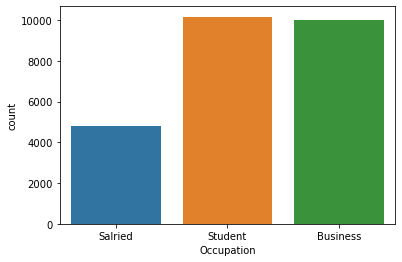

In [53]:
sns.countplot(df["Occupation"])  

<AxesSubplot:xlabel='Gender', ylabel='count'>

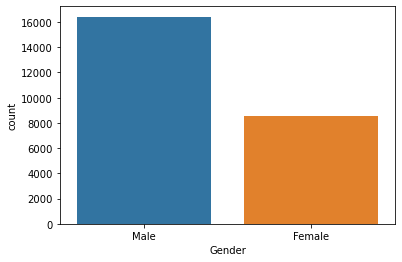

In [54]:
sns.countplot(df["Gender"]) 

In [55]:
df['Gender'].value_counts(normalize=True)

Male      0.65688
Female    0.34312
Name: Gender, dtype: float64

<AxesSubplot:xlabel='cholesterol_level', ylabel='count'>

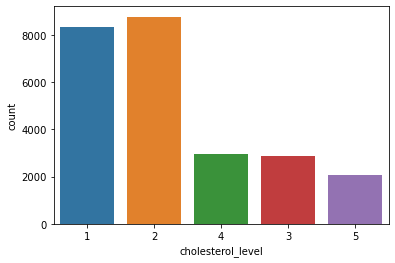

In [56]:
sns.countplot(df["cholesterol_level"])  

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

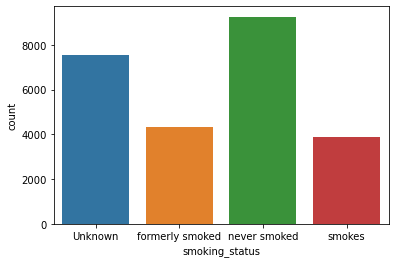

In [57]:
sns.countplot(df["smoking_status"])  

<AxesSubplot:xlabel='Location', ylabel='count'>

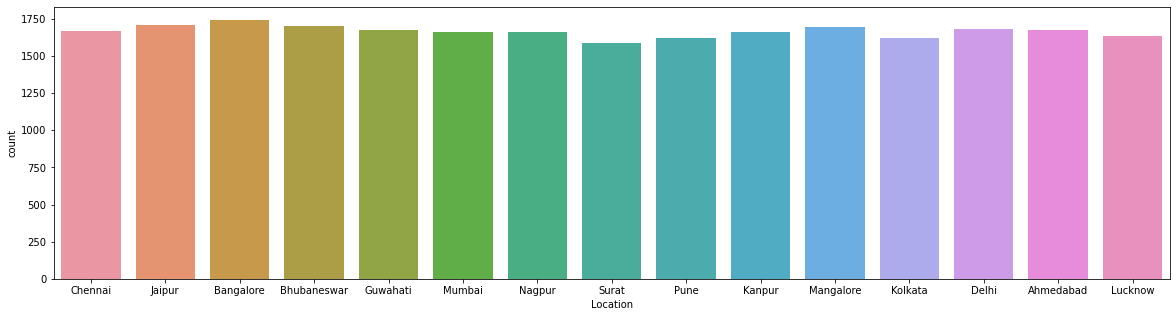

In [58]:
rcParams['figure.figsize'] = 20,5 
sns.countplot(df["Location"])

<AxesSubplot:xlabel='covered_by_any_other_company', ylabel='count'>

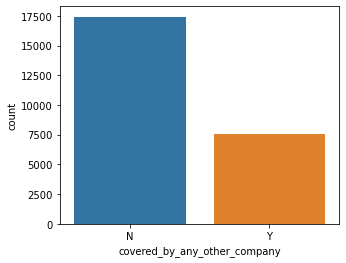

In [59]:
rcParams['figure.figsize'] = 5,4
sns.countplot(df["covered_by_any_other_company"])  

<AxesSubplot:xlabel='Alcohol', ylabel='count'>

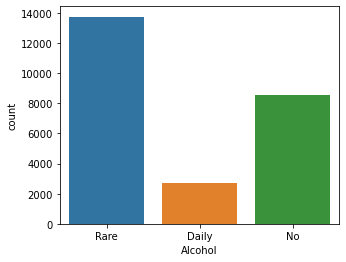

In [60]:
sns.countplot(df["Alcohol"])  

<AxesSubplot:xlabel='exercise', ylabel='count'>

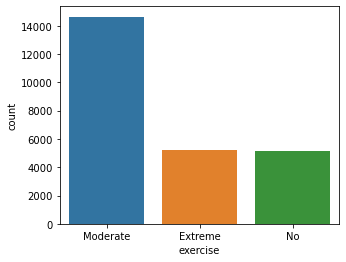

In [61]:
sns.countplot(df["exercise"])  

# Bivariate analysis

<AxesSubplot:xlabel='Occupation', ylabel='count'>

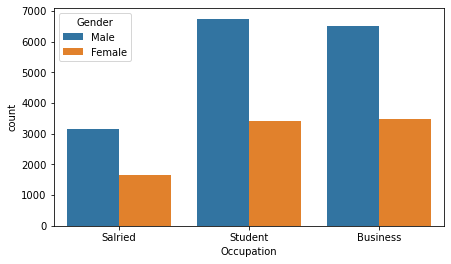

In [62]:
rcParams['figure.figsize'] = 7,4
sns.countplot(df["Occupation"],hue=df["Gender"])  

<AxesSubplot:xlabel='cholesterol_level', ylabel='count'>

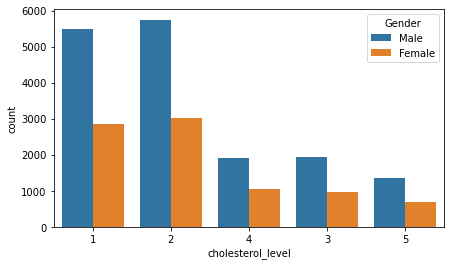

In [63]:
sns.countplot(df["cholesterol_level"],hue=df["Gender"])  

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

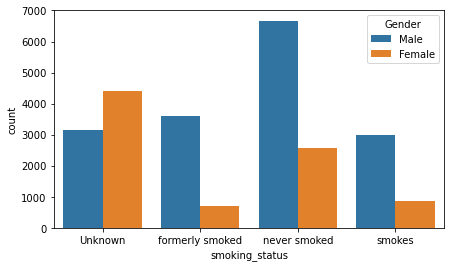

In [64]:
sns.countplot(df["smoking_status"],hue=df["Gender"])  

<AxesSubplot:xlabel='covered_by_any_other_company', ylabel='count'>

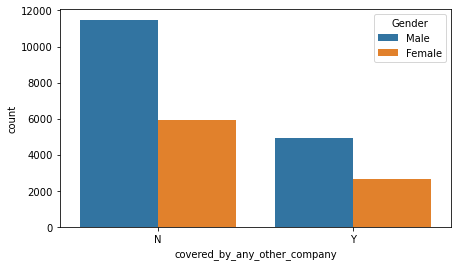

In [65]:
sns.countplot(df["covered_by_any_other_company"],hue=df["Gender"])  

<AxesSubplot:xlabel='Alcohol', ylabel='count'>

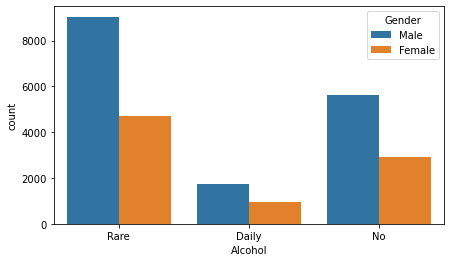

In [66]:
sns.countplot(df["Alcohol"],hue=df["Gender"])  

<AxesSubplot:xlabel='exercise', ylabel='count'>

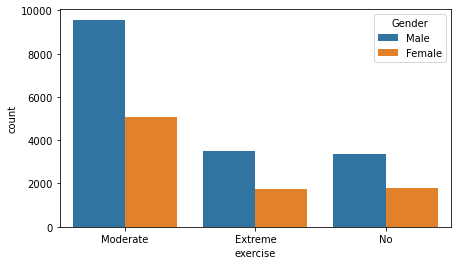

In [67]:
sns.countplot(df["exercise"],hue=df["Gender"])  

<AxesSubplot:xlabel='Location', ylabel='count'>

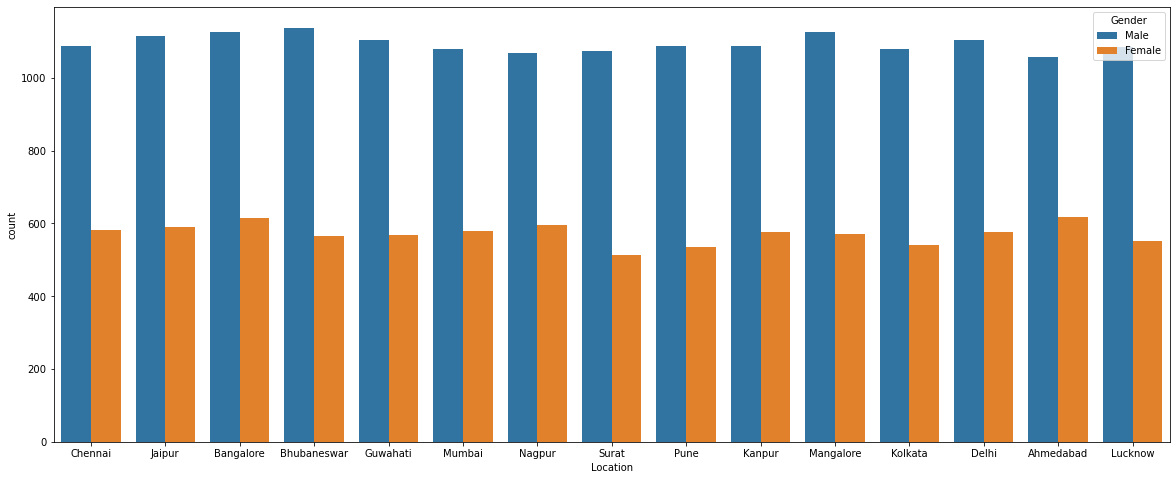

In [68]:
rcParams['figure.figsize'] = 20,8 
sns.countplot(df["Location"],hue=df["Gender"]) 

<AxesSubplot:xlabel='weight', ylabel='insurance_cost'>

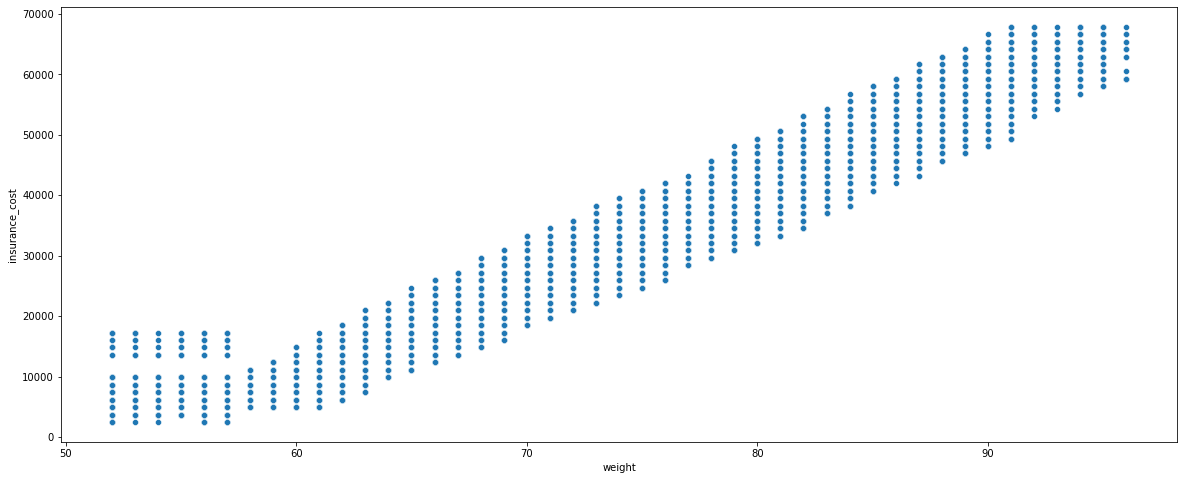

In [69]:
sns.scatterplot(data=df, x="weight", y="insurance_cost")

From the above graph we can interpret that majority of the people are High School passouts and this is true for both Males and Females

In [70]:
pd.crosstab(df['heart_decs_history'],df['Gender'], margins=True, normalize = True)

Gender               Female     Male      All
heart_decs_history                           
0                   0.33676  0.60860  0.94536
1                   0.00636  0.04828  0.05464
All                 0.34312  0.65688  1.00000

In [71]:
pd.crosstab(df['years_of_insurance_with_us'],df['Gender'], margins=True, normalize = True)

Gender                       Female     Male      All
years_of_insurance_with_us                           
0                           0.03848  0.07800  0.11648
1                           0.03756  0.07668  0.11424
2                           0.02456  0.04776  0.07232
3                           0.04336  0.07624  0.11960
4                           0.04100  0.07284  0.11384
5                           0.03888  0.07876  0.11764
6                           0.03880  0.07336  0.11216
7                           0.03892  0.07600  0.11492
8                           0.04156  0.07724  0.11880
All                         0.34312  0.65688  1.00000

In [72]:
pd.crosstab(df['regular_checkup_last_year'],df['Gender'], margins=True, normalize = True)

Gender                      Female     Male      All
regular_checkup_last_year                           
0                          0.20596  0.40264  0.60860
1                          0.06460  0.12116  0.18576
2                          0.03160  0.05632  0.08792
3                          0.02544  0.04728  0.07272
4                          0.01096  0.02012  0.03108
5                          0.00456  0.00936  0.01392
All                        0.34312  0.65688  1.00000

In [73]:
pd.crosstab(df['adventure_sports'],df['Gender'], margins=True, normalize = True)

Gender             Female     Male      All
adventure_sports                           
0                 0.31448  0.60380  0.91828
1                 0.02864  0.05308  0.08172
All               0.34312  0.65688  1.00000

In [74]:
pd.crosstab(df['visited_doctor_last_1_year'],df['Gender'], margins=True, normalize = True)

Gender                       Female     Male      All
visited_doctor_last_1_year                           
0                           0.00000  0.00004  0.00004
1                           0.00588  0.01140  0.01728
2                           0.11956  0.22720  0.34676
3                           0.09796  0.18580  0.28376
4                           0.09012  0.17820  0.26832
5                           0.01832  0.03228  0.05060
6                           0.00736  0.01448  0.02184
7                           0.00256  0.00500  0.00756
8                           0.00120  0.00184  0.00304
9                           0.00008  0.00044  0.00052
10                          0.00008  0.00016  0.00024
12                          0.00000  0.00004  0.00004
All                         0.34312  0.65688  1.00000

In [75]:
pd.crosstab(df['other_major_decs_history'],df['Gender'], margins=True, normalize = True)

Gender                     Female     Male      All
other_major_decs_history                           
0                         0.33272  0.56912  0.90184
1                         0.01040  0.08776  0.09816
All                       0.34312  0.65688  1.00000

In [76]:
pd.crosstab(df['Gender'],df['Occupation'], margins=True, normalize = True)

Occupation  Business  Salried  Student      All
Gender                                         
Female       0.13976  0.06656  0.13680  0.34312
Male         0.26104  0.12588  0.26996  0.65688
All          0.40080  0.19244  0.40676  1.00000

<AxesSubplot:xlabel='Gender', ylabel='insurance_cost'>

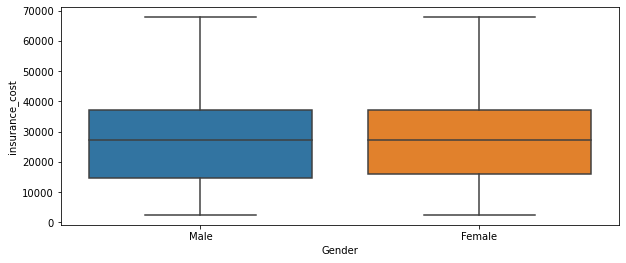

In [77]:
rcParams['figure.figsize'] = 10,4
sns.boxplot(x='Gender', y='insurance_cost', data=df)

<AxesSubplot:xlabel='exercise', ylabel='bmi'>

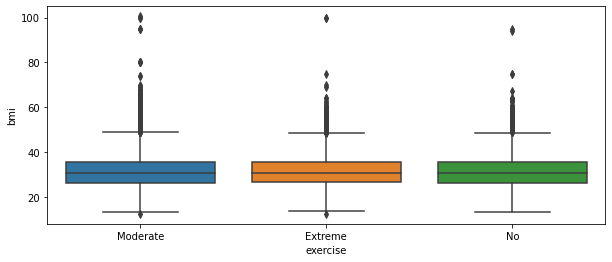

In [78]:
sns.boxplot(x='exercise', y='bmi', data=df)

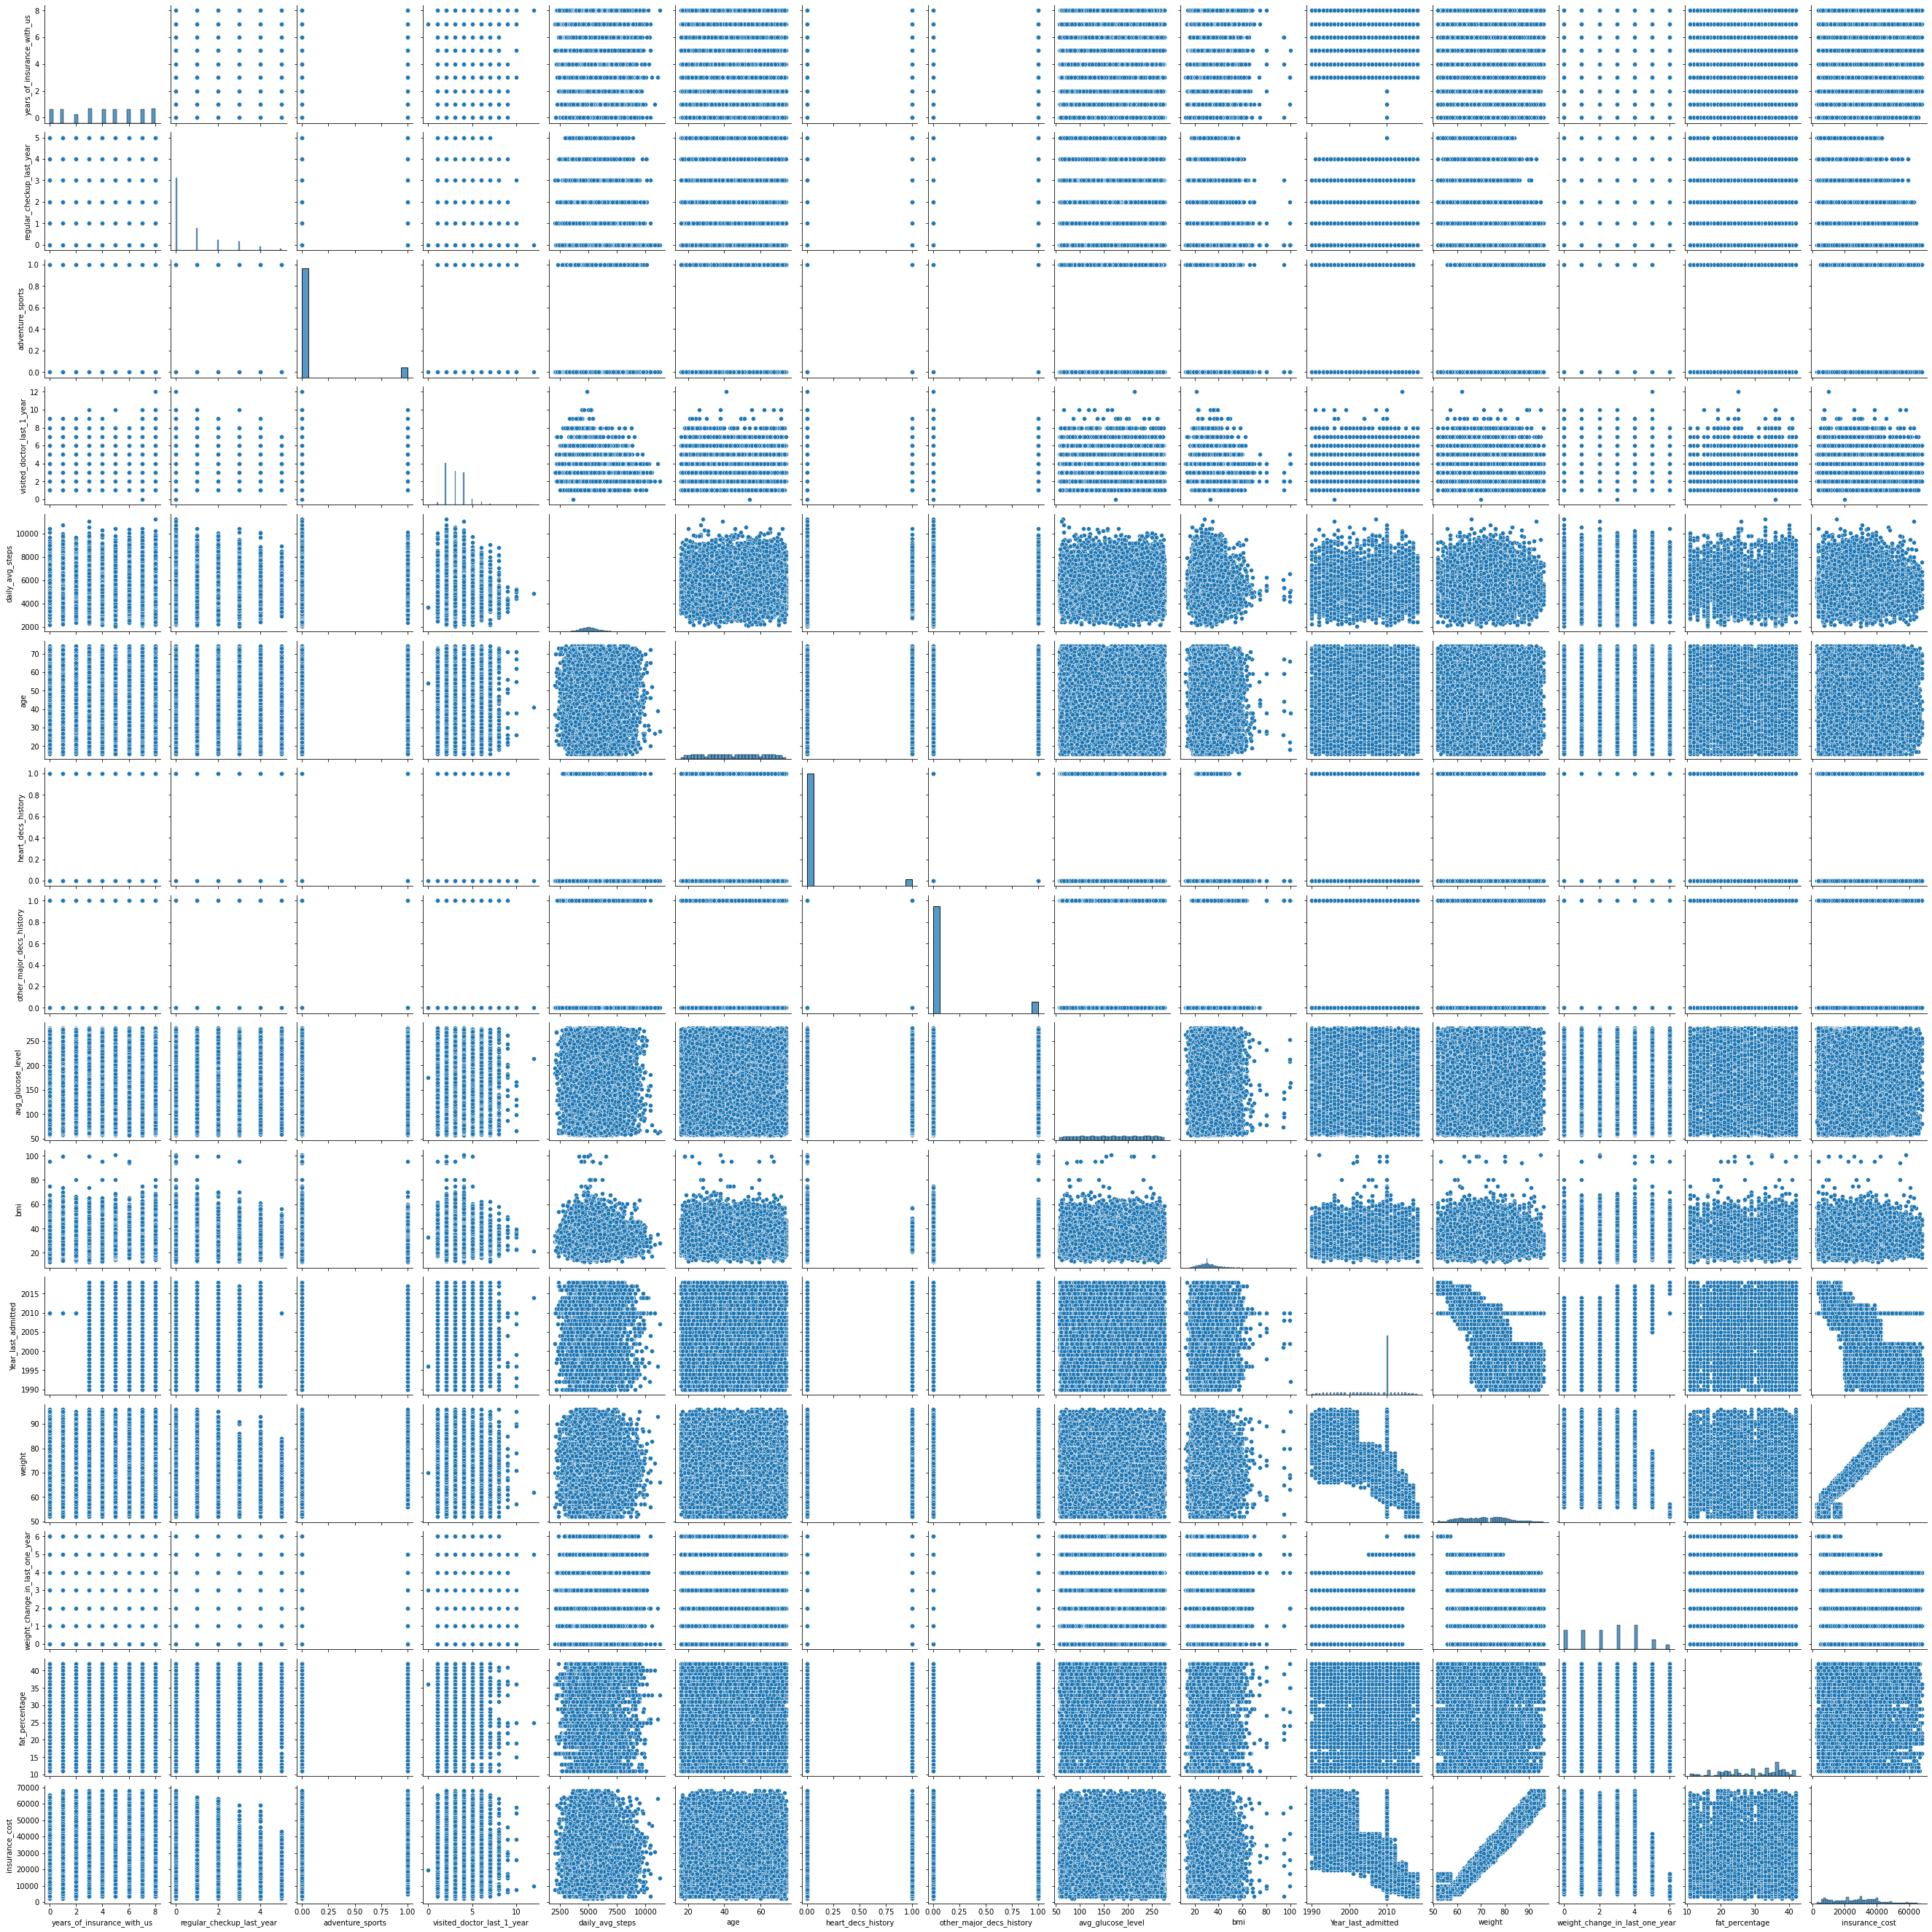

In [79]:
sns.pairplot(df)
plt.show()

**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**

In [80]:
df.corr()

years_of_insurance_with_us  \
years_of_insurance_with_us                        1.000000   
regular_checkup_last_year                         0.018549   
adventure_sports                                  0.016419   
visited_doctor_last_1_year                        0.002985   
daily_avg_steps                                  -0.001480   
age                                               0.004100   
heart_decs_history                               -0.001123   
other_major_decs_history                         -0.010548   
avg_glucose_level                                -0.000174   
bmi                                              -0.013185   
Year_last_admitted                               -0.266589   
weight                                           -0.006285   
weight_change_in_last_one_year                   -0.000608   
fat_percentage                                   -0.003302   
insurance_cost                                    0.001404   

                                regular_checkup_last_year  adventure_sports  \
years_of_insurance_with_us                       0.018549          0.016419   
regular_checkup_last_year                        1.000000          0.009298   
adventure_sports                                 0.009298          1.000000   
visited_doctor_last_1_year                      -0.005826          0.011143   
daily_avg_steps                                 -0.001928         -0.000671   
age                                              0.009033         -0.002440   
heart_decs_history                               0.000022          0.002808   
other_major_decs_history                        -0.009596          0.003661   
avg_glucose_level                                0.014459         -0.005933   
bmi                                             -0.008421         -0.002196   
Year_last_admitted                               0.130511         -0.062013   
weight                                          -0.142492          0.073938   
weight_change_in_last_one_year                  -0.012990         -0.047270   
fat_percentage                                   0.002190          0.003053   
insurance_cost                                  -0.174005          0.074561   

                                visited_doctor_last_1_year  daily_avg_steps  \
years_of_insurance_with_us                        0.002985        -0.001480   
regular_checkup_last_year                        -0.005826        -0.001928   
adventure_sports                                  0.011143        -0.000671   
visited_doctor_last_1_year                        1.000000        -0.156888   
daily_avg_steps                                  -0.156888         1.000000   
age                                              -0.001247        -0.000313   
heart_decs_history                               -0.003444         0.007256   
other_major_decs_history                          0.009338        -0.003661   
avg_glucose_level                                 0.008147         0.000482   
bmi                                               0.000630        -0.005585   
Year_last_admitted                               -0.010612         0.004260   
weight                                            0.012098        -0.005768   
weight_change_in_last_one_year                   -0.012733         0.008348   
fat_percentage                                   -0.043455         0.045827   
insurance_cost                                    0.008890        -0.006565   

                                     age  heart_decs_history  \
years_of_insurance_with_us      0.004100           -0.001123   
regular_checkup_last_year       0.009033            0.000022   
adventure_sports               -0.002440            0.002808   
visited_doctor_last_1_year     -0.001247           -0.003444   
daily_avg_steps                -0.000313            0.007256   
age                             1.000000           -0.003545   
heart_decs_history             -0.003545            1.000000 

## Correlation Heatmap

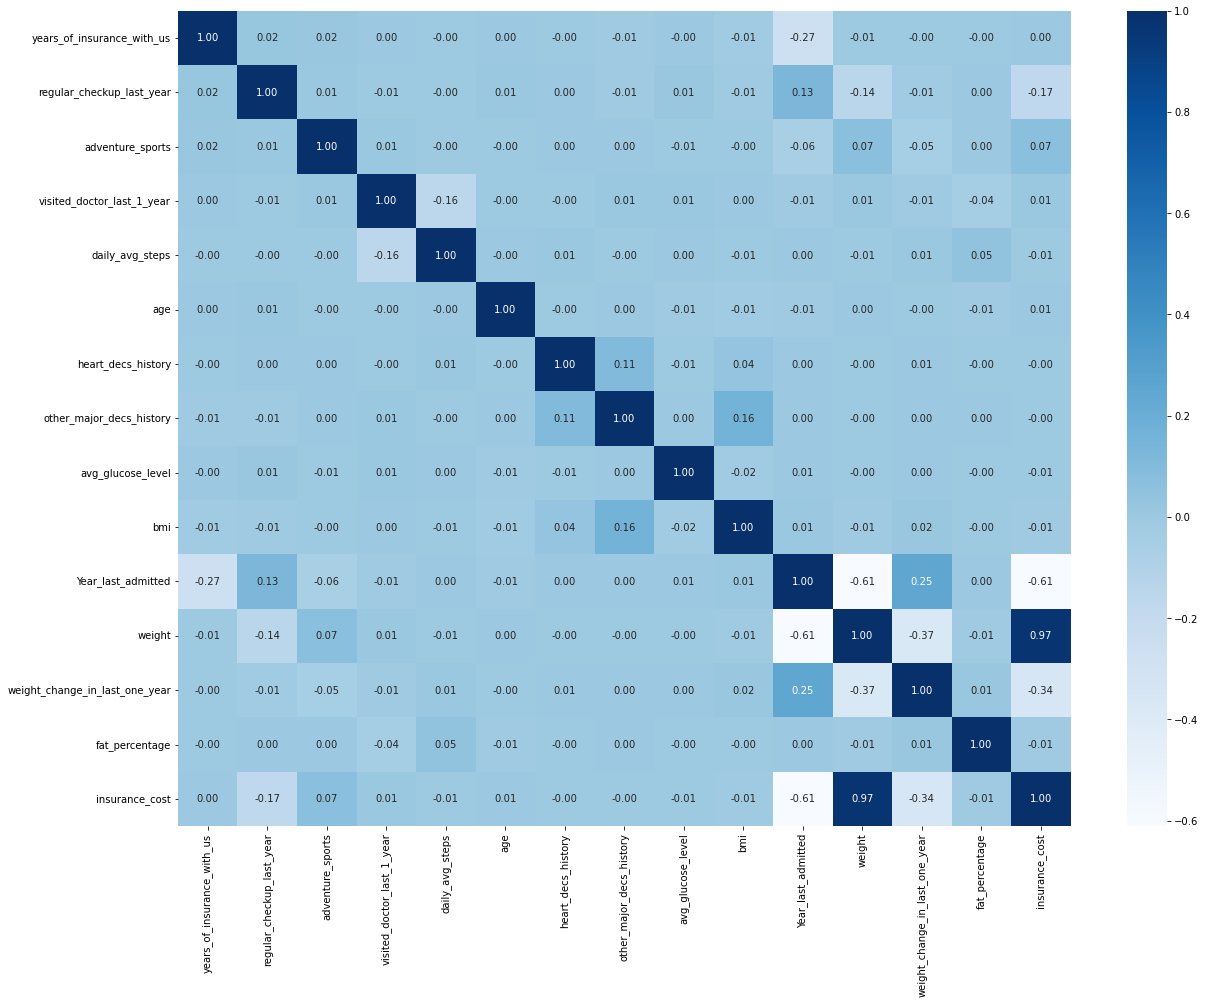

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap = 'Blues')
plt.show()

# Multivariate Analysis

<AxesSubplot:xlabel='weight', ylabel='insurance_cost'>

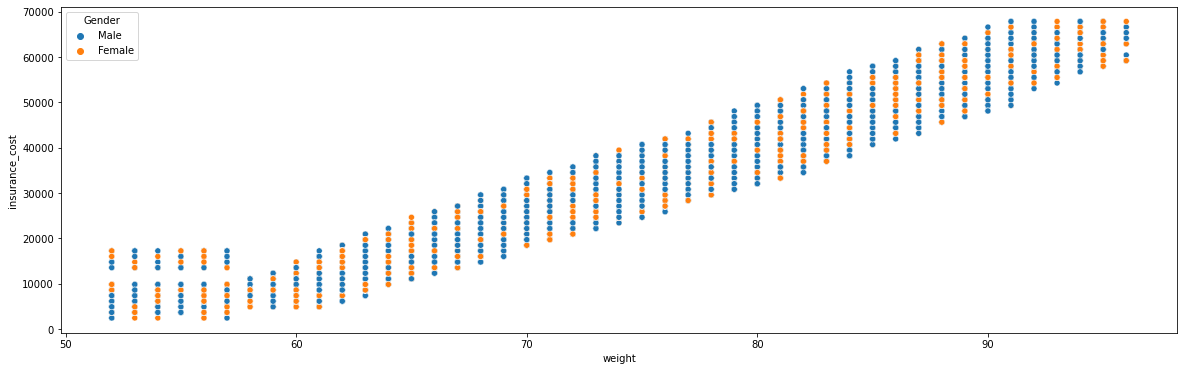

In [82]:
fig_dims = (20, 6)
fig = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="weight", y="insurance_cost", hue="Gender")

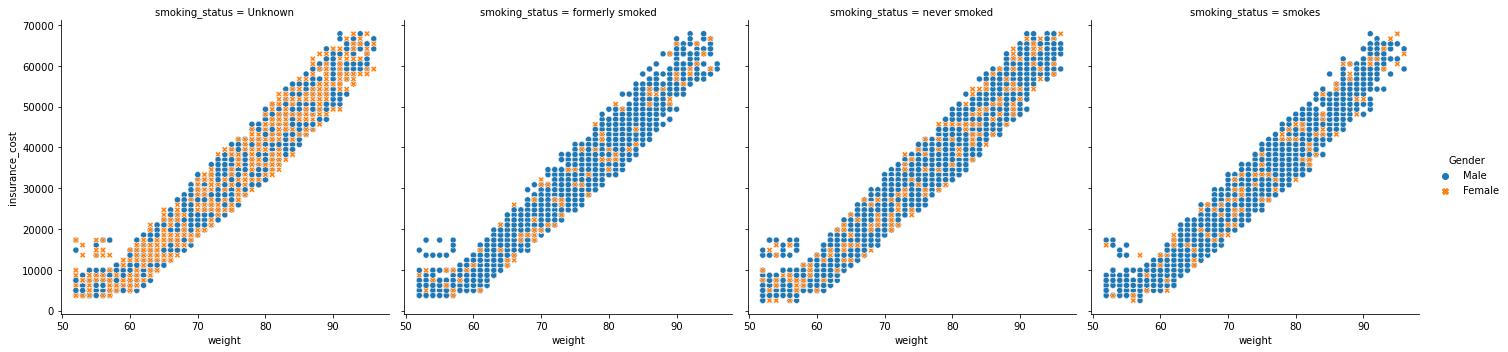

In [83]:
sns.relplot(
    data=df, x="weight", y="insurance_cost",
    col="smoking_status", hue="Gender", style="Gender",
    kind="scatter"
)

<AxesSubplot:xlabel='Occupation', ylabel='insurance_cost'>

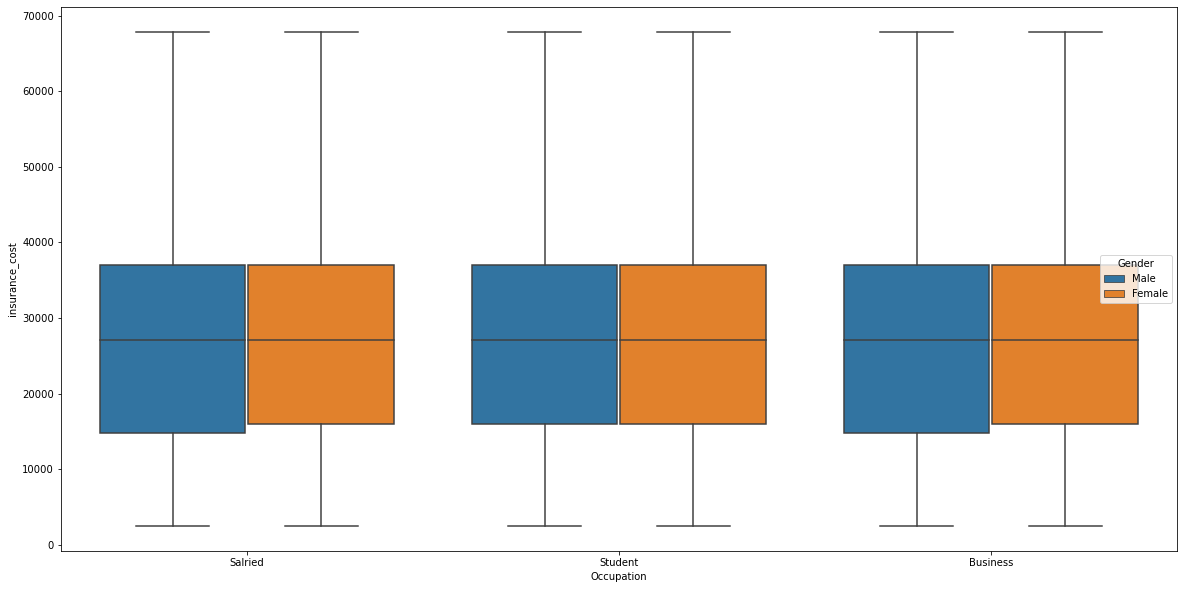

In [84]:
fig_dims = (20, 10)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Occupation', y='insurance_cost', hue='Gender', data=df)

<AxesSubplot:xlabel='Location', ylabel='insurance_cost'>

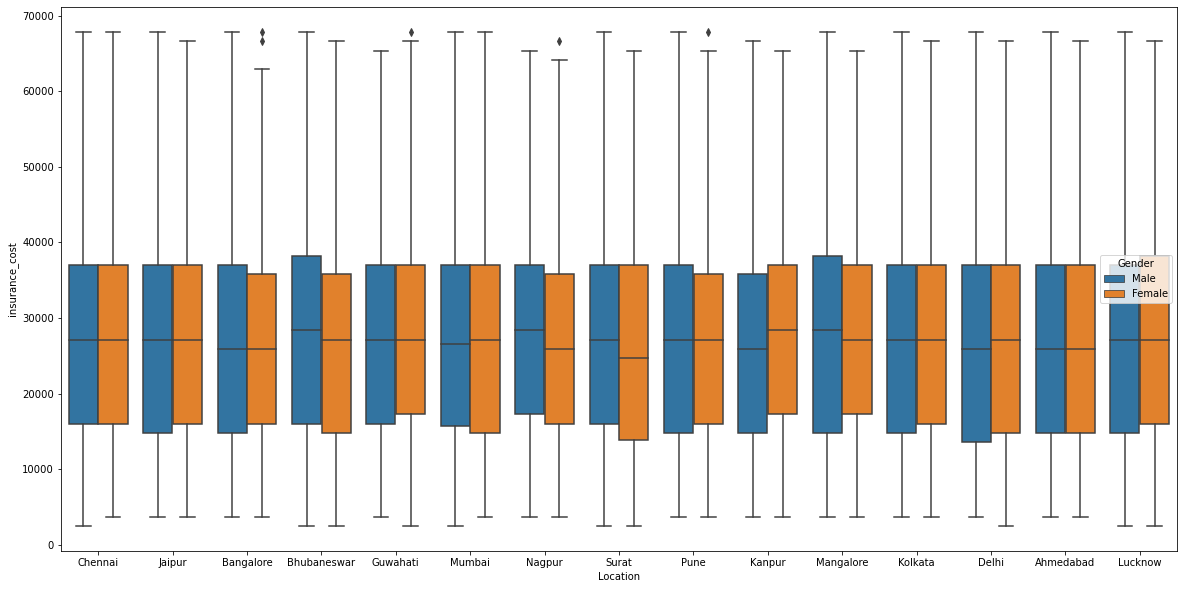

In [85]:
fig_dims = (20, 10)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Location', y='insurance_cost', hue='Gender', data=df)

<AxesSubplot:xlabel='exercise', ylabel='bmi'>

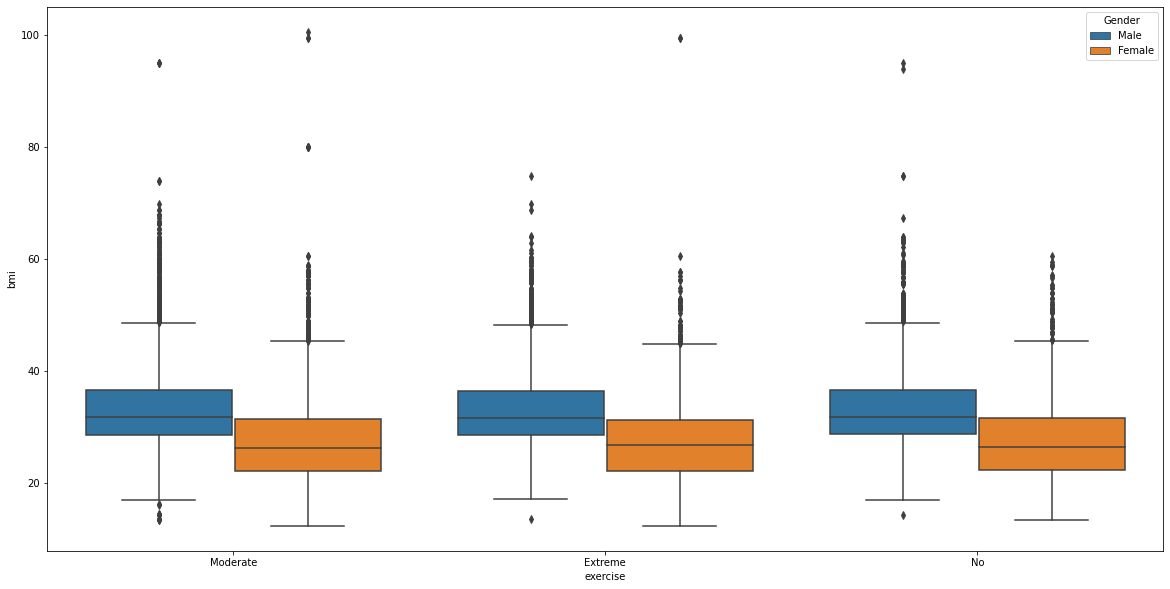

In [86]:
fig_dims = (20, 10)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='exercise', y='bmi', hue='Gender', data=df)

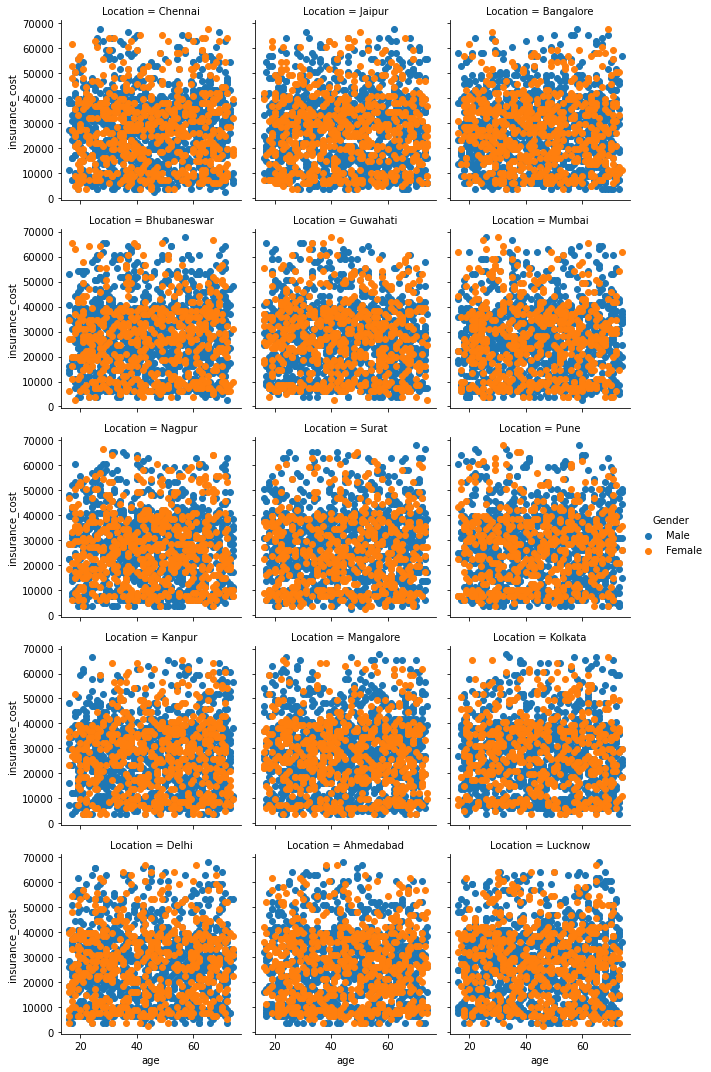

In [87]:
g = sns.FacetGrid(df, col="Location", hue='Gender',col_wrap=3, height=3)
g = g.map(plt.scatter, "age", 'insurance_cost')
g.add_legend()

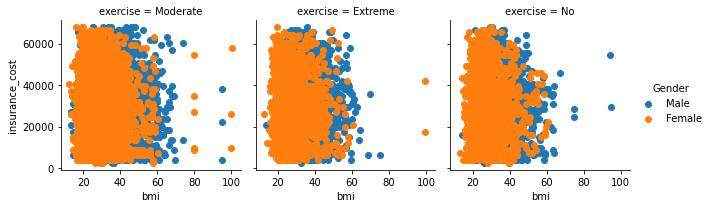

In [88]:
g = sns.FacetGrid(df, col="exercise", hue='Gender',col_wrap=3, height=3)
g = g.map(plt.scatter, "bmi", 'insurance_cost')
g.add_legend()

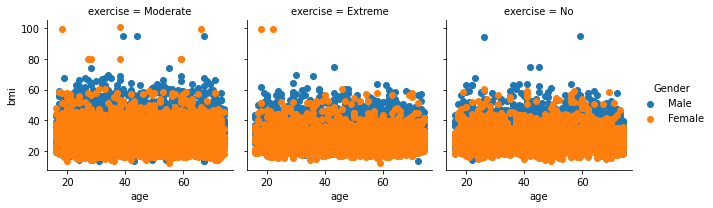

In [89]:
g = sns.FacetGrid(df, col="exercise", hue='Gender',col_wrap=3, height=3)
g = g.map(plt.scatter, 'age', "bmi")
g.add_legend()

# Data preparation

## Scaling

**Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.**

In [90]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']
['years_of_insurance_with_us', 'regular_checkup_last_year', 'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Year_last_admitted', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [91]:
# Method 1
## Using Zscore for scaling/standardisation
from scipy.stats import zscore
data_scaled=df[num].apply(zscore)

In [92]:
data_scaled.head()

years_of_insurance_with_us  regular_checkup_last_year  adventure_sports  \
0                   -0.417807                   0.188690          3.352150   
1                   -1.568750                  -0.645043         -0.298316   
2                   -1.185102                  -0.645043         -0.298316   
3                    1.116783                   2.689890         -0.298316   
4                   -0.417807                   0.188690         -0.298316   

   visited_doctor_last_1_year  daily_avg_steps       age  heart_decs_history  \
0                   -0.967205        -0.332228 -1.050360            4.159520   
1                    0.784661         1.134787  0.315492           -0.240412   
2                    0.784661        -0.671209  1.433007           -0.240412   
3                   -0.967205         0.947731  0.377576           -0.240412   
4                   -0.967205        -0.263863 -0.057013           -0.240412   

   other_major_decs_history  avg_glucose_level       bmi  Year_last_admitted  \
0                 -0.329915          -1.124370 -0.020458            0.510204   
1                 -0.329915           0.708929  0.368102            0.510204   
2                 -0.329915          -0.024391  1.171127            0.510204   
3                 -0.329915          -0.933069 -1.095475            0.510204   
4                  3.031081          -0.789594 -0.629202           -0.444900   

     weight  weight_change_in_last_one_year  fat_percentage  insurance_cost  
0 -0.494422                       -0.898041       -0.441634       -0.430722  
1 -1.459569                        0.285180       -0.209944       -1.464554  
2  0.149010                       -1.489652        0.369282        0.086194  
3 -0.065467                        0.285180        0.948508        0.000041  
4  0.256249                       -1.489652        0.600972        0.172347

In [93]:
df.describe()

years_of_insurance_with_us  regular_checkup_last_year  \
count                25000.000000               25000.000000   
mean                     4.089040                   0.773680   
std                      2.606612                   1.199449   
min                      0.000000                   0.000000   
25%                      2.000000                   0.000000   
50%                      4.000000                   0.000000   
75%                      6.000000                   1.000000   
max                      8.000000                   5.000000   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  \
count      25000.000000                25000.000000     25000.000000   
mean           0.081720                    3.104200      5215.889320   
std            0.273943                    1.141663      1053.179748   
min            0.000000                    0.000000      2034.000000   
25%            0.000000                    2.000000      4543.000000   
50%            0.000000                    3.000000      5089.000000   
75%            0.000000                    4.000000      5730.000000   
max            1.000000                   12.000000     11255.000000   

                age  heart_decs_history  other_major_decs_history  \
count  25000.000000        25000.000000              25000.000000   
mean      44.918320            0.054640                  0.098160   
std       16.107492            0.227281                  0.297537   
min       16.000000            0.000000                  0.000000   
25%       31.000000            0.000000                  0.000000   
50%       45.000000            0.000000                  0.000000   
75%       59.000000            0.000000                  0.000000   
max       74.000000            1.000000                  1.000000   

       avg_glucose_level           bmi  Year_last_admitted        weight  \
count       25000.000000  25000.000000        25000.000000  25000.000000   
mean          167.530000     31.357952         2006.794880     71.610480   
std            62.729712      7.720963            6.282164      9.325183   
min            57.000000     12.300000         1990.000000     52.000000   
25%           113.000000     26.300000         2003.000000     64.000000   
50%           168.000000     30.500000         2010.000000     72.000000   
75%           222.000000     35.300000         2010.000000     78.000000   
max           277.000000    100.600000         2018.000000     96.000000   

       weight_change_in_last_one_year  fat_percentage  insurance_cost  
count                    25000.000000    25000.000000    25000.000000  
mean                         2.517960       28.812280    27147.407680  
std                          1.690335        8.632382    14323.691832  
min                          0.000000       11.000000     2468.000000  
25%                          1.000000       21.000000    16042.000000  
50%                          3.000000       31.000000    27148.000000  
75%                          4.000000       36.000000    37020.000000  
max                          6.000000       42.000000    67870.000000

In [94]:
data_scaled.describe()

years_of_insurance_with_us  regular_checkup_last_year  \
count                2.500000e+04               2.500000e+04   
mean                -6.197443e-16              -1.056470e-15   
std                  1.000020e+00               1.000020e+00   
min                 -1.568750e+00              -6.450427e-01   
25%                 -8.014550e-01              -6.450427e-01   
50%                 -3.415997e-02              -6.450427e-01   
75%                  7.331350e-01               1.886905e-01   
max                  1.500430e+00               3.523623e+00   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  \
count      2.500000e+04                2.500000e+04     2.500000e+04   
mean      -1.265019e-15                4.659961e-16    -2.032907e-16   
std        1.000020e+00                1.000020e+00     1.000020e+00   
min       -2.983160e-01               -2.719070e+00    -3.021282e+00   
25%       -2.983160e-01               -9.672049e-01    -6.389249e-01   
50%       -2.983160e-01               -9.127219e-02    -1.204845e-01   
75%       -2.983160e-01                7.846605e-01     4.881607e-01   
max        3.352150e+00                7.792122e+00     5.734284e+00   

                age  heart_decs_history  other_major_decs_history  \
count  2.500000e+04        2.500000e+04              2.500000e+04   
mean  -8.559375e-17       -1.325162e-17              3.912026e-16   
std    1.000020e+00        1.000020e+00              1.000020e+00   
min   -1.795369e+00       -2.404123e-01             -3.299154e-01   
25%   -8.641071e-01       -2.404123e-01             -3.299154e-01   
50%    5.071034e-03       -2.404123e-01             -3.299154e-01   
75%    8.742492e-01       -2.404123e-01             -3.299154e-01   
max    1.805511e+00        4.159520e+00              3.031081e+00   

       avg_glucose_level           bmi  Year_last_admitted        weight  \
count       2.500000e+04  2.500000e+04        2.500000e+04  2.500000e+04   
mean       -8.428813e-18  3.061729e-16        1.171339e-14  4.625011e-16   
std         1.000020e+00  1.000020e+00        1.000020e+00  1.000020e+00   
min        -1.762039e+00 -2.468388e+00       -2.673476e+00 -2.103001e+00   
25%        -8.693024e-01 -6.551065e-01       -6.040842e-01 -8.161376e-01   
50%         7.492612e-03 -1.111220e-01        5.102038e-01  4.177160e-02   
75%         8.683459e-01  5.105745e-01        5.102038e-01  6.852035e-01   
max         1.745141e+00  8.968237e+00        1.783676e+00  2.615499e+00   

       weight_change_in_last_one_year  fat_percentage  insurance_cost  
count                    2.500000e+04    2.500000e+04    2.500000e+04  
mean                    -8.179235e-17   -3.092238e-16    3.682388e-17  
std                      1.000020e+00    1.000020e+00    1.000020e+00  
min                     -1.489652e+00   -2.063467e+00   -1.723013e+00  
25%                     -8.980412e-01   -9.050151e-01   -7.753329e-01  
50%                      2.851800e-01    2.534369e-01    4.135329e-05  
75%                      8.767906e-01    8.326628e-01    6.892629e-01  
max                      2.060012e+00    1.527734e+00    2.843080e+00

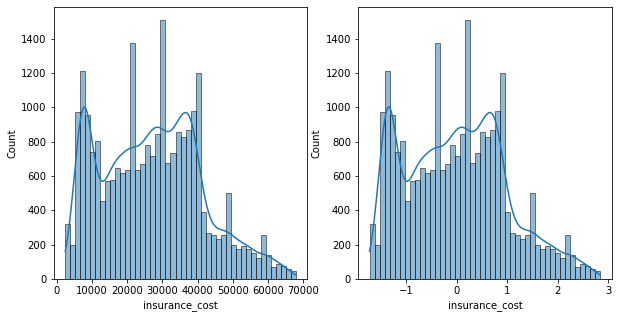

In [95]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['insurance_cost'] , kde=True, ax=axes[0])
sns.histplot(data_scaled['insurance_cost'] , kde=True, ax=axes[1])
plt.show()

Applying zscore or using StandardScalar give us the same results.
It scales the data in such a way that the mean value of the features tends to 0 and the standard deviation tends to 1.
Min-Max method ensure that the data scaled to have values in the range 0 to 1.

**If we look at the variables,  all have been normalized and scaled in one scale now.**

## Transformation

In [96]:
df.insurance_cost.describe()

count    25000.000000
mean     27147.407680
std      14323.691832
min       2468.000000
25%      16042.000000
50%      27148.000000
75%      37020.000000
max      67870.000000
Name: insurance_cost, dtype: float64

<AxesSubplot:xlabel='insurance_cost'>

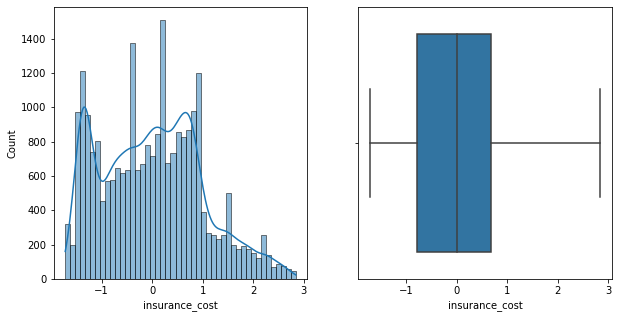

In [97]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(data_scaled.insurance_cost, kde=True, ax=axs[0]) 
sns.boxplot(x= 'insurance_cost', data=data_scaled, ax=axs[1]) 

In [98]:
print("skewness of insurance_cost is",data_scaled['insurance_cost'].skew())
print("kurtosis of insurance_cost is ", data_scaled['insurance_cost'].kurtosis())

skewness of insurance_cost is 0.33165006251159934
kurtosis of insurance_cost is  -0.5020550403211033


Skewness assesses the extent to which a variable’s distribution is symmetrical 

Kurtosis is a measure of whether the distribution is too peaked

For an ideal normal distribution (theoretical) Skewness and Kurtosis have to be between -1 to +1 Or we can say that if we are able to reduce the skewness and kurtosis from a very high value to lower values we are able to get the data distirbuted more normally

# Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

<AxesSubplot:xlabel='years_of_insurance_with_us'>

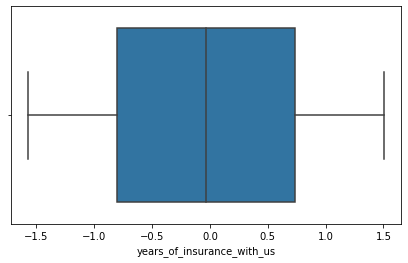

In [99]:
rcParams['figure.figsize'] = 7,4
sns.boxplot(x='years_of_insurance_with_us', data=data_scaled) 

<AxesSubplot:xlabel='regular_checkup_last_year'>

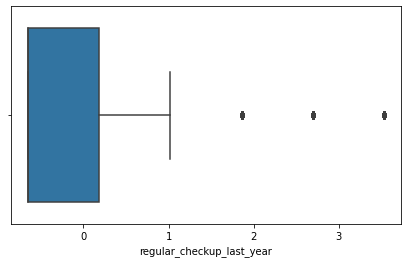

In [100]:
sns.boxplot(x='regular_checkup_last_year', data=data_scaled) 

<AxesSubplot:xlabel='daily_avg_steps'>

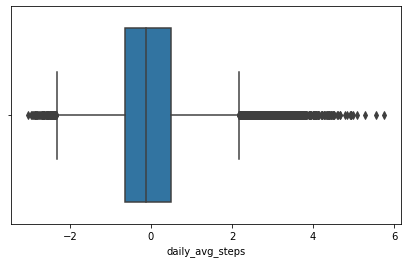

In [101]:
sns.boxplot(x='daily_avg_steps', data=data_scaled) 

<AxesSubplot:xlabel='age'>

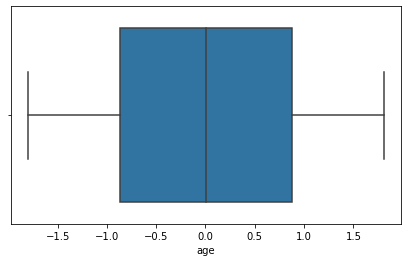

In [102]:
sns.boxplot(x='age', data=data_scaled) 

<AxesSubplot:xlabel='avg_glucose_level'>

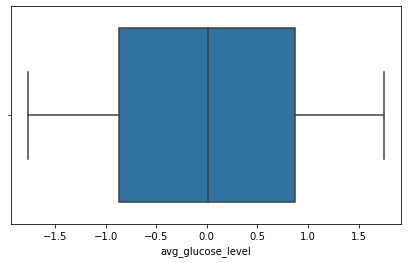

In [103]:
sns.boxplot(x='avg_glucose_level', data=data_scaled) 

<AxesSubplot:xlabel='bmi'>

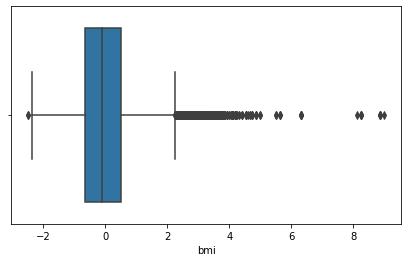

In [104]:
sns.boxplot(x='bmi', data=data_scaled) 

<AxesSubplot:xlabel='Year_last_admitted'>

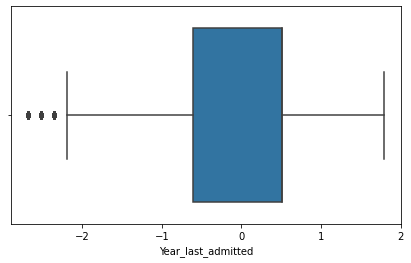

In [105]:
sns.boxplot(x='Year_last_admitted', data=data_scaled) 

<AxesSubplot:xlabel='weight'>

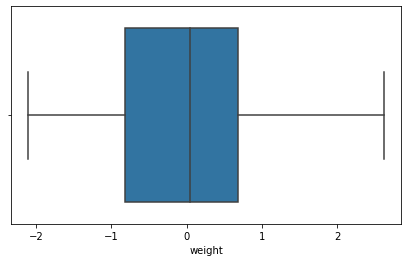

In [106]:
sns.boxplot(x='weight', data=data_scaled) 

<AxesSubplot:xlabel='weight_change_in_last_one_year'>

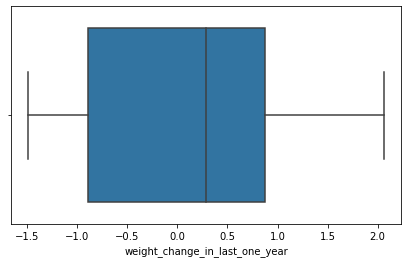

In [107]:
sns.boxplot(x='weight_change_in_last_one_year', data=data_scaled) 

<AxesSubplot:xlabel='fat_percentage'>

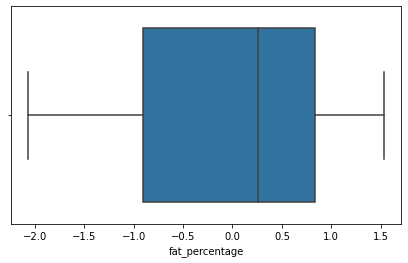

In [108]:
sns.boxplot(x='fat_percentage', data=data_scaled) 

<AxesSubplot:xlabel='insurance_cost'>

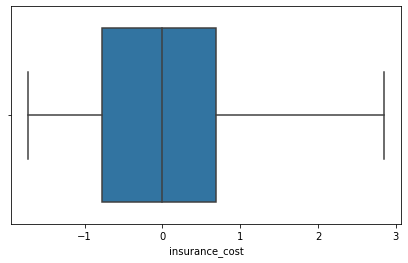

In [109]:
sns.boxplot(x='insurance_cost', data=data_scaled)

**Looking at the box plot, it seems that the four variables regular_checkup_last_year, daily_avg_steps, Bmi, year_last_admitted have outlier present in the variables.**

**These outliers value needs to be teated and there are several ways of treating them:**
    
- **Drop the outlier value**
- **Replace the outlier value using the IQR**


**Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [110]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [111]:
lrregular_checkup_last_year,urregular_checkup_last_year=remove_outlier(data_scaled['regular_checkup_last_year'])
data_scaled['regular_checkup_last_year']=np.where(data_scaled['regular_checkup_last_year']>urregular_checkup_last_year,urregular_checkup_last_year,data_scaled['regular_checkup_last_year'])
data_scaled['regular_checkup_last_year']=np.where(data_scaled['regular_checkup_last_year']<lrregular_checkup_last_year,lrregular_checkup_last_year,data_scaled['regular_checkup_last_year'])


lrvisited_doctor_last_1_year,urvisited_doctor_last_1_year=remove_outlier(data_scaled['visited_doctor_last_1_year'])
data_scaled['visited_doctor_last_1_year']=np.where(data_scaled['visited_doctor_last_1_year']>urvisited_doctor_last_1_year,urvisited_doctor_last_1_year,data_scaled['visited_doctor_last_1_year'])
data_scaled['visited_doctor_last_1_year']=np.where(data_scaled['visited_doctor_last_1_year']<lrvisited_doctor_last_1_year,lrvisited_doctor_last_1_year,data_scaled['visited_doctor_last_1_year'])

lrdaily_avg_steps,urdaily_avg_steps=remove_outlier(data_scaled['daily_avg_steps'])
data_scaled['daily_avg_steps']=np.where(data_scaled['daily_avg_steps']>urdaily_avg_steps,urdaily_avg_steps,data_scaled['daily_avg_steps'])
data_scaled['daily_avg_steps']=np.where(data_scaled['daily_avg_steps']<lrdaily_avg_steps,lrdaily_avg_steps,data_scaled['daily_avg_steps'])

lrbmi,urbmi=remove_outlier(data_scaled['bmi'])
data_scaled['bmi']=np.where(data_scaled['bmi']>urbmi,urbmi,data_scaled['bmi'])
data_scaled['bmi']=np.where(data_scaled['bmi']<lrbmi,lrbmi,data_scaled['bmi'])

data_scaled.shape

(25000, 15)

##  Make Boxplots after Outlier Treatment

<AxesSubplot:xlabel='regular_checkup_last_year'>

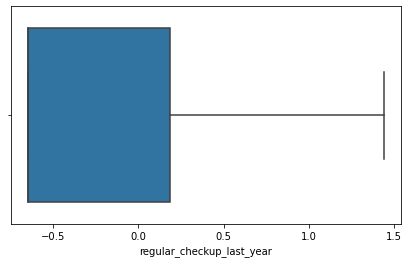

In [112]:
sns.boxplot(x='regular_checkup_last_year', data=data_scaled) 

<AxesSubplot:xlabel='visited_doctor_last_1_year'>

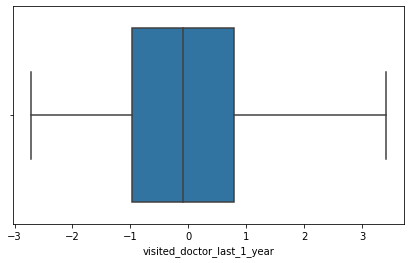

In [113]:
sns.boxplot(x='visited_doctor_last_1_year', data=data_scaled) 

<AxesSubplot:xlabel='daily_avg_steps'>

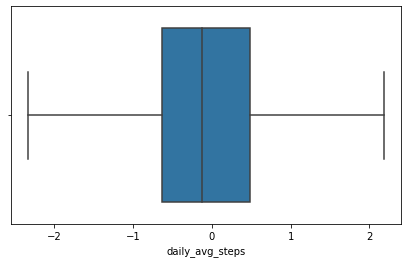

In [114]:
sns.boxplot(x='daily_avg_steps', data=data_scaled) 

<AxesSubplot:xlabel='bmi'>

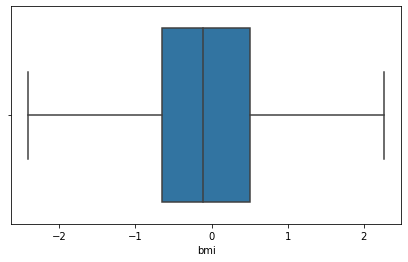

In [115]:
sns.boxplot(x='bmi', data=data_scaled) 

**If you look at the box plots above,post treating the outlier there are no outliers in all these columns.**

## Multicollinearity

## Statistical tests to be done before PCA

Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.


#### H0: All variables in the data are uncorrelated
#### Ha: At least one pair of variables in the data are correlated
If the null hypothesis cannot be rejected, then PCA is not advisable.


Here, the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended

In [116]:
df_num = data_scaled.select_dtypes(['float64','int64'])

In [117]:
len(df_num.columns)

15

In [118]:
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num)
p_value

0.0

KMO Test
The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [119]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num)
kmo_model

0.6546199061928036

In [120]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=15, random_state=123)
pca_transformed = pca.fit_transform(df_num)

In [121]:
#Extract eigen vectors
pca.components_

array([[ 7.32491853e-02, -8.92846658e-02,  7.63074145e-02,
         1.32306464e-02, -7.80785904e-03,  5.38601507e-03,
        -3.74206548e-03, -3.78170312e-03, -5.64363998e-03,
        -1.00023683e-02, -4.76341855e-01,  5.73443882e-01,
        -3.12567503e-01, -9.63335710e-03,  5.71737760e-01],
       [-1.27495437e-01, -2.00173950e-02,  2.26144908e-02,
         5.92473555e-02, -3.69766343e-02, -2.08794551e-02,
         5.53799974e-01,  7.08580768e-01, -5.07634533e-02,
         4.02781469e-01,  3.26903790e-02,  2.25158399e-02,
        -5.03514257e-03, -4.15186304e-02,  2.45682921e-02],
       [ 6.32787752e-02,  1.24443594e-02,  3.72000095e-02,
         6.92612527e-01, -4.93518452e-01,  3.26988537e-02,
        -7.41577730e-02, -2.72603472e-02,  6.02277648e-02,
        -1.85597360e-02, -1.77352823e-03, -2.76308710e-02,
        -2.27680156e-02, -5.07694407e-01, -2.93658086e-02],
       [ 8.96684733e-01,  2.34903710e-02,  5.89675117e-02,
        -3.64831816e-02,  2.51721205e-02,  4.66877359

In [122]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([2.70205434, 1.16716936, 1.10356787, 1.0918125 , 1.01241631,
       0.99717427, 0.98594637, 0.96198157, 0.92259565, 0.825542  ,
       0.76286892, 0.74411948, 0.54274455, 0.40330117, 0.02860308])

In [123]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.1895926 , 0.08189572, 0.07743305, 0.07660822, 0.0710373 ,
       0.06996783, 0.06918001, 0.06749849, 0.06473493, 0.05792506,
       0.05352753, 0.05221196, 0.03808227, 0.02829807, 0.00200697])

In [124]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 
                                                'PC6','PC7','PC8', 'PC9', 'PC10', 
                                                'PC11','PC12','PC13','PC14', 'PC15'],
                                    index = df_num.columns)

In [125]:
df_extracted_loadings

PC1       PC2       PC3       PC4  \
years_of_insurance_with_us      0.073249 -0.127495  0.063279  0.896685   
regular_checkup_last_year      -0.089285 -0.020017  0.012444  0.023490   
adventure_sports                0.076307  0.022614  0.037200  0.058968   
visited_doctor_last_1_year      0.013231  0.059247  0.692613 -0.036483   
daily_avg_steps                -0.007808 -0.036977 -0.493518  0.025172   
age                             0.005386 -0.020879  0.032699  0.046688   
heart_decs_history             -0.003742  0.553800 -0.074158  0.113252   
other_major_decs_history       -0.003782  0.708581 -0.027260  0.083381   
avg_glucose_level              -0.005644 -0.050763  0.060228 -0.026548   
bmi                            -0.010002  0.402781 -0.018560  0.031881   
Year_last_admitted             -0.476342  0.032690 -0.001774 -0.306944   
weight                          0.573444  0.022516 -0.027631 -0.140936   
weight_change_in_last_one_year -0.312568 -0.005035 -0.022768  0.186864   
fat_percentage                 -0.009633 -0.041519 -0.507694  0.027885   
insurance_cost                  0.571738  0.024568 -0.029366 -0.128491   

                                     PC5       PC6       PC7       PC8  \
years_of_insurance_with_us     -0.043449 -0.027889 -0.044532 -0.002856   
regular_checkup_last_year      -0.005968  0.033466  0.064080  0.019774   
adventure_sports               -0.017444  0.775807  0.568593  0.228662   
visited_doctor_last_1_year     -0.063779  0.101853  0.008254 -0.419526   
daily_avg_steps                 0.014962 -0.052495  0.030508  0.245325   
age                             0.710890 -0.373705  0.573722 -0.133904   
heart_decs_history             -0.023544 -0.041704  0.027609  0.152772   
other_major_decs_history       -0.020103 -0.049175  0.054670 -0.095171   
avg_glucose_level              -0.683808 -0.449905  0.558002  0.061885   
bmi                             0.000521  0.015814 -0.063872 -0.054233   
Year_last_admitted              0.014026  0.044869  0.043782  0.022758   
weight                         -0.001195 -0.031962 -0.024930 -0.013847   
weight_change_in_last_one_year -0.007538 -0.015545 -0.053948 -0.036224   
fat_percentage                 -0.138952  0.179192  0.122949 -0.807361   
insurance_cost                  0.001341 -0.035100 -0.026362 -0.013271   

                                     PC9      PC10      PC11      PC12  \
years_of_insurance_with_us     -0.031004  0.166663 -0.026106  0.008080   
regular_checkup_last_year       0.014044  0.285708 -0.046954 -0.001325   
adventure_sports               -0.047289 -0.082638 -0.006434 -0.018553   
visited_doctor_last_1_year      0.122814 -0.025033  0.085673  0.549191   
daily_avg_steps                -0.054070  0.003900  0.147967  0.815712   
age                             0.010076 -0.032018 -0.052514  0.009614   
heart_decs_history              0.797802 -0.024523 -0.107025 -0.000064   
other_major_decs_history       -0.418665  0.104098  0.530346 -0.087800   
avg_glucose_level              -0.040235 -0.039433 -0.064393 -0.011603   
bmi                            -0.383321 -0.077123 -0.808971  0.147342   
Year_last_admitted              0.019126  0.121649 -0.012385 -0.000135   
weight                          0.002444 -0.154506  0.014168 -0.005803   
weight_change_in_last_one_year -0.030197 -0.886367  0.109264 -0.030612   
fat_percentage                  0.129920  0.036783 -0.032914 -0.043232   
insurance_cost                  0.003314 -0.193618  0.020074 -0.010300   

                                    PC13      PC14      PC15  
years_of_insurance_with_us     -0.049214 -0.365695 -0.005945  
regular_checkup_last_year       0.947833  0.043323  0.031159  
adventure_sports               -0.039780  0.002080 -0.001421  
visited_doctor_last_1_year      0.009282 -0.002626  0.002454  
daily_avg_steps                 0.007294 -0.002933  0.001284  
age                            -0.012562 -0.006035 -0.002783  
heart_decs_history             -0.003944 

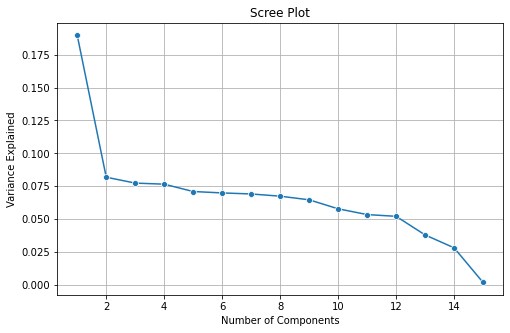

In [126]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,16),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [127]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.1895926 , 0.27148832, 0.34892137, 0.42552959, 0.49656689,
       0.56653472, 0.63571472, 0.70321321, 0.76794815, 0.82587321,
       0.87940074, 0.9316127 , 0.96969497, 0.99799303, 1.        ])

In [128]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11']]

In [129]:
#Check the selected PCs
df_selected

PC1       PC2       PC3       PC4  \
years_of_insurance_with_us      0.073249 -0.127495  0.063279  0.896685   
regular_checkup_last_year      -0.089285 -0.020017  0.012444  0.023490   
adventure_sports                0.076307  0.022614  0.037200  0.058968   
visited_doctor_last_1_year      0.013231  0.059247  0.692613 -0.036483   
daily_avg_steps                -0.007808 -0.036977 -0.493518  0.025172   
age                             0.005386 -0.020879  0.032699  0.046688   
heart_decs_history             -0.003742  0.553800 -0.074158  0.113252   
other_major_decs_history       -0.003782  0.708581 -0.027260  0.083381   
avg_glucose_level              -0.005644 -0.050763  0.060228 -0.026548   
bmi                            -0.010002  0.402781 -0.018560  0.031881   
Year_last_admitted             -0.476342  0.032690 -0.001774 -0.306944   
weight                          0.573444  0.022516 -0.027631 -0.140936   
weight_change_in_last_one_year -0.312568 -0.005035 -0.022768  0.186864   
fat_percentage                 -0.009633 -0.041519 -0.507694  0.027885   
insurance_cost                  0.571738  0.024568 -0.029366 -0.128491   

                                     PC5       PC6       PC7       PC8  \
years_of_insurance_with_us     -0.043449 -0.027889 -0.044532 -0.002856   
regular_checkup_last_year      -0.005968  0.033466  0.064080  0.019774   
adventure_sports               -0.017444  0.775807  0.568593  0.228662   
visited_doctor_last_1_year     -0.063779  0.101853  0.008254 -0.419526   
daily_avg_steps                 0.014962 -0.052495  0.030508  0.245325   
age                             0.710890 -0.373705  0.573722 -0.133904   
heart_decs_history             -0.023544 -0.041704  0.027609  0.152772   
other_major_decs_history       -0.020103 -0.049175  0.054670 -0.095171   
avg_glucose_level              -0.683808 -0.449905  0.558002  0.061885   
bmi                             0.000521  0.015814 -0.063872 -0.054233   
Year_last_admitted              0.014026  0.044869  0.043782  0.022758   
weight                         -0.001195 -0.031962 -0.024930 -0.013847   
weight_change_in_last_one_year -0.007538 -0.015545 -0.053948 -0.036224   
fat_percentage                 -0.138952  0.179192  0.122949 -0.807361   
insurance_cost                  0.001341 -0.035100 -0.026362 -0.013271   

                                     PC9      PC10      PC11  
years_of_insurance_with_us     -0.031004  0.166663 -0.026106  
regular_checkup_last_year       0.014044  0.285708 -0.046954  
adventure_sports               -0.047289 -0.082638 -0.006434  
visited_doctor_last_1_year      0.122814 -0.025033  0.085673  
daily_avg_steps                -0.054070  0.003900  0.147967  
age                             0.010076 -0.032018 -0.052514  
heart_decs_history              0.797802 -0.024523 -0.107025  
other_major_decs_history       -0.418665  0.104098  0.530346  
avg_glucose_level              -0.040235 -0.039433 -0.064393  
bmi                            -0.383321 -0.077123 -0.808971  
Year_last_admitted              0.019126  0.121649 -0.012385  
weight                          0.002444 -0.154506  0.014168  
weight_change_in_last_one_year -0.030197 -0.886367  0.109264  
fat_percentage                  0.129920  0.036783 -0.032914  
insurance_cost                  0.003314 -0.193618  0.020074

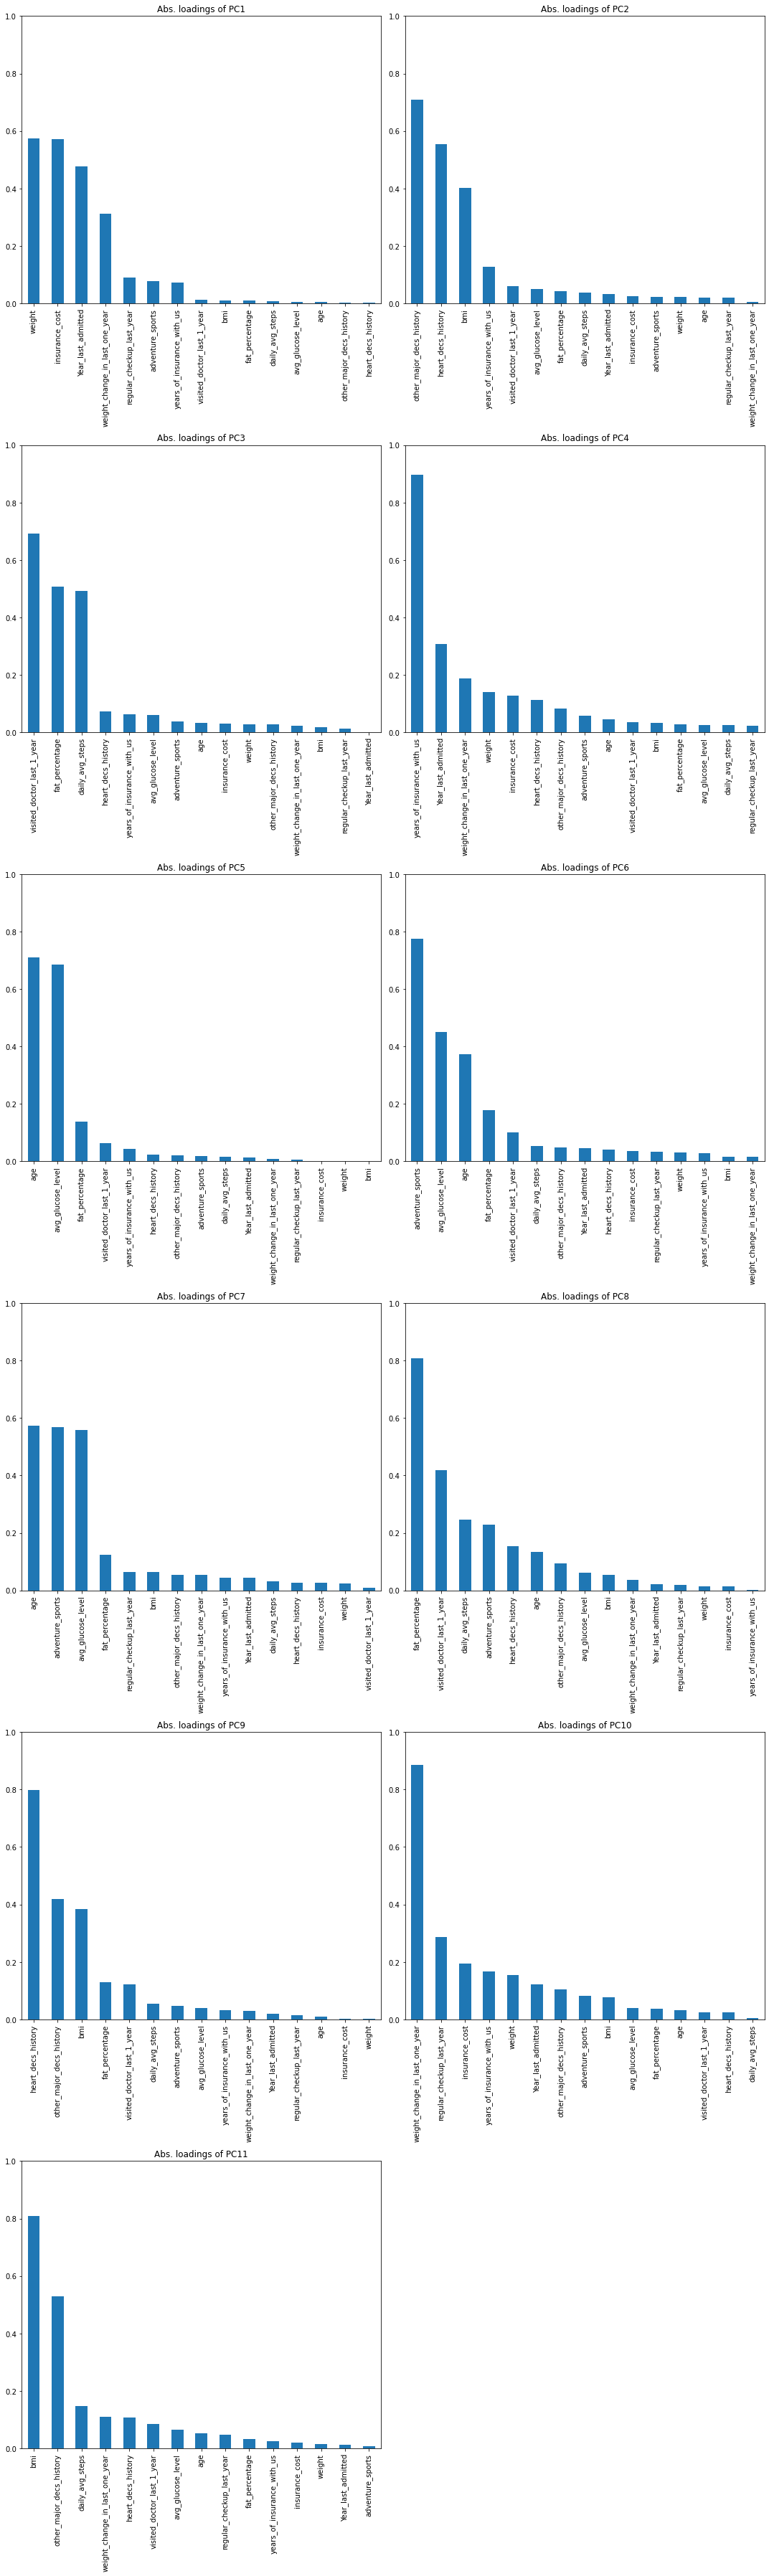

In [130]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (15,50))
for i in range(len(df_selected.columns)):
    plt.subplot(6,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

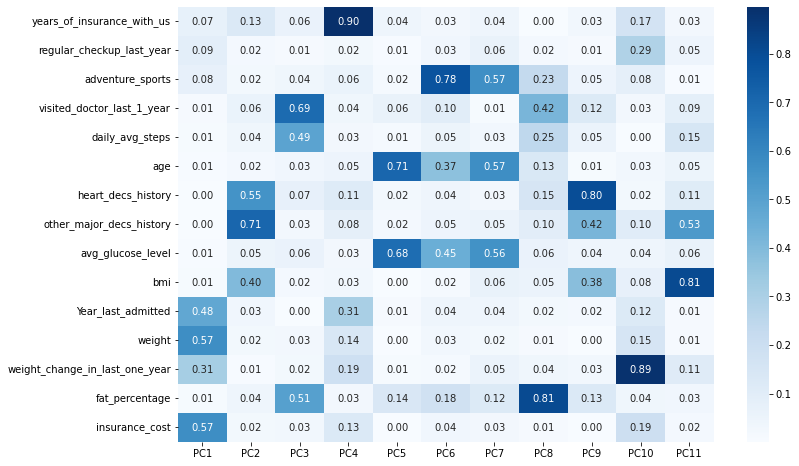

In [131]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [132]:
#In order to calculate PC scores we need loadings, below:
df_selected

PC1       PC2       PC3       PC4  \
years_of_insurance_with_us      0.073249 -0.127495  0.063279  0.896685   
regular_checkup_last_year      -0.089285 -0.020017  0.012444  0.023490   
adventure_sports                0.076307  0.022614  0.037200  0.058968   
visited_doctor_last_1_year      0.013231  0.059247  0.692613 -0.036483   
daily_avg_steps                -0.007808 -0.036977 -0.493518  0.025172   
age                             0.005386 -0.020879  0.032699  0.046688   
heart_decs_history             -0.003742  0.553800 -0.074158  0.113252   
other_major_decs_history       -0.003782  0.708581 -0.027260  0.083381   
avg_glucose_level              -0.005644 -0.050763  0.060228 -0.026548   
bmi                            -0.010002  0.402781 -0.018560  0.031881   
Year_last_admitted             -0.476342  0.032690 -0.001774 -0.306944   
weight                          0.573444  0.022516 -0.027631 -0.140936   
weight_change_in_last_one_year -0.312568 -0.005035 -0.022768  0.186864   
fat_percentage                 -0.009633 -0.041519 -0.507694  0.027885   
insurance_cost                  0.571738  0.024568 -0.029366 -0.128491   

                                     PC5       PC6       PC7       PC8  \
years_of_insurance_with_us     -0.043449 -0.027889 -0.044532 -0.002856   
regular_checkup_last_year      -0.005968  0.033466  0.064080  0.019774   
adventure_sports               -0.017444  0.775807  0.568593  0.228662   
visited_doctor_last_1_year     -0.063779  0.101853  0.008254 -0.419526   
daily_avg_steps                 0.014962 -0.052495  0.030508  0.245325   
age                             0.710890 -0.373705  0.573722 -0.133904   
heart_decs_history             -0.023544 -0.041704  0.027609  0.152772   
other_major_decs_history       -0.020103 -0.049175  0.054670 -0.095171   
avg_glucose_level              -0.683808 -0.449905  0.558002  0.061885   
bmi                             0.000521  0.015814 -0.063872 -0.054233   
Year_last_admitted              0.014026  0.044869  0.043782  0.022758   
weight                         -0.001195 -0.031962 -0.024930 -0.013847   
weight_change_in_last_one_year -0.007538 -0.015545 -0.053948 -0.036224   
fat_percentage                 -0.138952  0.179192  0.122949 -0.807361   
insurance_cost                  0.001341 -0.035100 -0.026362 -0.013271   

                                     PC9      PC10      PC11  
years_of_insurance_with_us     -0.031004  0.166663 -0.026106  
regular_checkup_last_year       0.014044  0.285708 -0.046954  
adventure_sports               -0.047289 -0.082638 -0.006434  
visited_doctor_last_1_year      0.122814 -0.025033  0.085673  
daily_avg_steps                -0.054070  0.003900  0.147967  
age                             0.010076 -0.032018 -0.052514  
heart_decs_history              0.797802 -0.024523 -0.107025  
other_major_decs_history       -0.418665  0.104098  0.530346  
avg_glucose_level              -0.040235 -0.039433 -0.064393  
bmi                            -0.383321 -0.077123 -0.808971  
Year_last_admitted              0.019126  0.121649 -0.012385  
weight                          0.002444 -0.154506  0.014168  
weight_change_in_last_one_year -0.030197 -0.886367  0.109264  
fat_percentage                  0.129920  0.036783 -0.032914  
insurance_cost                  0.003314 -0.193618  0.020074

In [133]:
#...and we need the original scaled features
df_num.iloc[0]

years_of_insurance_with_us       -0.417807
regular_checkup_last_year         0.188690
adventure_sports                  3.352150
visited_doctor_last_1_year       -0.967205
daily_avg_steps                  -0.332228
age                              -1.050360
heart_decs_history                4.159520
other_major_decs_history         -0.329915
avg_glucose_level                -1.124370
bmi                              -0.020458
Year_last_admitted                0.510204
weight                           -0.494422
weight_change_in_last_one_year   -0.898041
fat_percentage                   -0.441634
insurance_cost                   -0.430722
Name: 0, dtype: float64

In [134]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_num.iloc[0])
    print(round(pc_score, 6), end = ' ')

-0.303146 2.23864 -0.536412 0.066401 0.021426 3.266968 0.82685 2.247992 3.232222 0.674977 -0.733131 

In [135]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=11, random_state=123)
pca_final = pca.fit_transform(df_num)

In [136]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.312280  2.245061 -0.545164  0.069908  0.020954  3.269717  0.832519   
1 -2.095999 -0.088984  0.111812 -1.198345 -0.170372 -0.512059  0.490209   
2  0.306556  0.325424  0.661206 -1.544015  1.015287 -0.477412  0.684667   
3 -0.457218 -1.058147 -1.552730  0.965366  0.814952  0.118203 -0.234057   
4  0.827028  1.782095 -0.968705 -0.315204  0.444706  0.028834 -0.299492   
5  1.216602 -0.150311  0.222082  1.294813  0.138725 -0.540008 -0.986206   
6  1.270379 -0.456380  1.502491  1.149709  0.832457  0.230681 -1.498384   
7  0.274487 -0.574319 -0.767422 -1.619928 -0.808036 -0.667664  0.836945   
8 -0.113237 -0.793061  1.462721  1.133239  0.640412 -0.202749 -0.701953   
9 -1.194578  0.534754  1.423229 -0.205180  0.905812  0.460208 -1.326245   

        PC8       PC9      PC10      PC11  
0  2.253133  3.224128  0.701285 -0.751810  
1  0.064619 -0.174075 -0.194250 -0.237952  
2 -1.064309 -0.217451  0.839521 -1.335353  
3 -0.217353  0.353376  0.611243  0.713793  
4 -0.496620 -1.155580  1.676733  1.889532  
5  1.765406 -0.805705 -0.600196 -0.782930  
6  0.587589  0.000662 -0.492525  0.314497  
7 -0.204429  0.312278  0.996726  0.569588  
8  1.323140  0.127963  1.275268  0.634720  
9  1.284710 -0.863740  2.050606 -1.961911

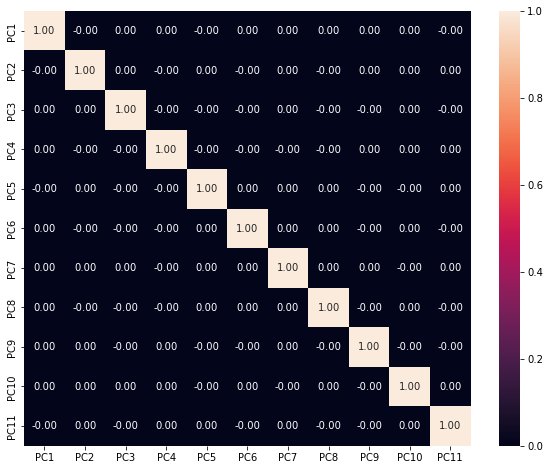

In [137]:
#Check for presence of correlations among the PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [138]:
df_cat = df.select_dtypes(['object'])

In [139]:
df_pca_new = pd.concat([df_cat, pca_final_df], axis=1)

# ENCODING

**One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.**

**This is required to do since the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.**

**get_dummies is the method which creates dummy variable for each categorical variable.**

**It is considered a good practice to set parameter `drop_first` as `True` whenever get_dummies is used. It reduces the chances of multicollinearity which will be covered in coming courses and the number of features are also less as compared to `drop_first=False`**

In [140]:
df_new =pd.get_dummies(df_pca_new, columns=cat,drop_first=True)

In [141]:
df_new.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.312280  2.245061 -0.545164  0.069908  0.020954  3.269717  0.832519   
1 -2.095999 -0.088984  0.111812 -1.198345 -0.170372 -0.512059  0.490209   
2  0.306556  0.325424  0.661206 -1.544015  1.015287 -0.477412  0.684667   
3 -0.457218 -1.058147 -1.552730  0.965366  0.814952  0.118203 -0.234057   
4  0.827028  1.782095 -0.968705 -0.315204  0.444706  0.028834 -0.299492   

        PC8       PC9      PC10      PC11  Occupation_Salried  \
0  2.253133  3.224128  0.701285 -0.751810                   1   
1  0.064619 -0.174075 -0.194250 -0.237952                   0   
2 -1.064309 -0.217451  0.839521 -1.335353                   0   
3 -0.217353  0.353376  0.611243  0.713793                   0   
4 -0.496620 -1.155580  1.676733  1.889532                   0   

   Occupation_Student  cholesterol_level_2  cholesterol_level_3  \
0                   0                    0                    0   
1                   1                    1                    0   
2                   0                    0                    0   
3                   0                    0                    1   
4                   1                    1                    0   

   cholesterol_level_4  cholesterol_level_5  Gender_Male  \
0                    0                    0            1   
1                    0                    0            1   
2                    1                    0            0   
3                    0                    0            0   
4                    0                    0            1   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               0                            0   
1                               1                            0   
2                               1                            0   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  Location_Bangalore  Location_Bhubaneswar  \
0                      0                   0                     0   
1                      0                   0                     0   
2                      0                   0                     0   
3                      0                   0                     0   
4                      0                   1                     0   

   Location_Chennai  Location_Delhi  Location_Guwahati  Location_Jaipur  \
0                 1               0                  0                0   
1                 0               0                  0                1   
2                 0               0                  0                1   
3                 1               0                  0                0   
4                 0               0                  0                0   

   Location_Kanpur  Location_Kolkata  Location_Lucknow  Location_Mangalore  \
0                0                 0                 0                   0   
1                0                 0                 0                   0   
2                0                 0                 0                   0   
3                0                 0                 0                   0   
4                0                 0                 0                   0   

   Location_Mumbai  Location_Nagpur  Location_Pune  Location_Surat  \
0                0                0              0               0   
1                0                0              0               0   
2                0                0              0               0   
3                0                0              0               0   
4                0                0              0               0   

   covered_by_any_other_company_Y  Alcohol_No  Alcohol_Rare  \
0                               0           0             1   
1                               0           0             1   
2                               0           0         

**In the data set, each Category in all of the categorical columns have been added as columns with values 0 and 1**
**Example: Occupation_Salried, Gender_Male
**If Gender_Male =1, then it means its a Male and Gender_Male=0 means its a Female**

# Clustering

In [142]:
from sklearn.cluster import KMeans 

### K-Means clustering with 2 clusters

In [143]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(df_new)
k_means2.labels_

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

### the within cluster sum of squares for 2 clusters for the K-Means algorithm

In [144]:
k_means2.inertia_

357598.8098610467

### K-Means clustering with 3 clusters and the within cluster sum of squares for 3 clusters

In [145]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(df_new)
k_means3.inertia_

334666.58050971554

### Within Sum of Squares (WSS) for 2 to 15 clusters

In [146]:
wss =[] 

In [147]:
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_new)
    wss.append(KM.inertia_)

In [148]:
wss

[403277.0861948237,
 357598.8098610467,
 334666.58050971554,
 317869.0479431501,
 307557.02979533677,
 288867.7069537262,
 273808.9281934849,
 268012.4538565579,
 263617.7379769511,
 259731.14221520748,
 256526.70640403844,
 253009.10953251788,
 249953.2249468235,
 246990.8848361045]

### the Within Sum of Squares (WSS) plot

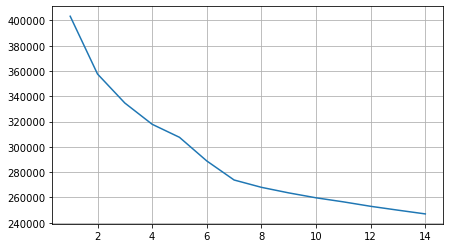

In [149]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

### the optimum number of clusters from the WSS plot

### Firstly, we will check with 2 clusters.

In [150]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_new)
labels = k_means.labels_
labels

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

### Now, let us check with 7 clusters.

In [151]:
k_means7 = KMeans(n_clusters = 7,random_state=1)
k_means7.fit(df_new)
labels_7 = k_means7.labels_
labels_7

array([0, 6, 2, ..., 5, 2, 0], dtype=int32)

### the average silhouette score and silhouette width of the cluster(s) thus created

In [152]:
from sklearn.metrics import silhouette_samples, silhouette_score

### Let us check the silhouette score and silhouette width for 2 clusters.

In [153]:
silhouette_score(df_new,labels)

0.10620928658615003

In [154]:
silhouette_samples(df_new,labels).min()

-0.020030057130769306

### Let us check the silhouette score and silhouette width for 7 clusters.

In [155]:
silhouette_score(df_new,labels_7)

0.09226448951145735

In [156]:
silhouette_samples(df_new,labels_7).min()

-0.025087099708634833

In [157]:
df_new['Kmeans_clusters'] = labels

In [158]:
pd.options.display.max_columns = None
df_new.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.312280  2.245061 -0.545164  0.069908  0.020954  3.269717  0.832519   
1 -2.095999 -0.088984  0.111812 -1.198345 -0.170372 -0.512059  0.490209   
2  0.306556  0.325424  0.661206 -1.544015  1.015287 -0.477412  0.684667   
3 -0.457218 -1.058147 -1.552730  0.965366  0.814952  0.118203 -0.234057   
4  0.827028  1.782095 -0.968705 -0.315204  0.444706  0.028834 -0.299492   

        PC8       PC9      PC10      PC11  Occupation_Salried  \
0  2.253133  3.224128  0.701285 -0.751810                   1   
1  0.064619 -0.174075 -0.194250 -0.237952                   0   
2 -1.064309 -0.217451  0.839521 -1.335353                   0   
3 -0.217353  0.353376  0.611243  0.713793                   0   
4 -0.496620 -1.155580  1.676733  1.889532                   0   

   Occupation_Student  cholesterol_level_2  cholesterol_level_3  \
0                   0                    0                    0   
1                   1                    1                    0   
2                   0                    0                    0   
3                   0                    0                    1   
4                   1                    1                    0   

   cholesterol_level_4  cholesterol_level_5  Gender_Male  \
0                    0                    0            1   
1                    0                    0            1   
2                    1                    0            0   
3                    0                    0            0   
4                    0                    0            1   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               0                            0   
1                               1                            0   
2                               1                            0   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  Location_Bangalore  Location_Bhubaneswar  \
0                      0                   0                     0   
1                      0                   0                     0   
2                      0                   0                     0   
3                      0                   0                     0   
4                      0                   1                     0   

   Location_Chennai  Location_Delhi  Location_Guwahati  Location_Jaipur  \
0                 1               0                  0                0   
1                 0               0                  0                1   
2                 0               0                  0                1   
3                 1               0                  0                0   
4                 0               0                  0                0   

   Location_Kanpur  Location_Kolkata  Location_Lucknow  Location_Mangalore  \
0                0                 0                 0                   0   
1                0                 0                 0                   0   
2                0                 0                 0                   0   
3                0                 0                 0                   0   
4                0                 0                 0                   0   

   Location_Mumbai  Location_Nagpur  Location_Pune  Location_Surat  \
0                0                0              0               0   
1                0                0              0               0   
2                0                0              0               0   
3                0                0              0               0   
4                0                0              0               0   

   covered_by_any_other_company_Y  Alcohol_No  Alcohol_Rare  \
0                               0           0             1   
1                               0           0             1   
2                               0           0         

In [160]:
df_new.Kmeans_clusters.value_counts().sort_index()

0    12571
1    12429
Name: Kmeans_clusters, dtype: int64

In [163]:
clust_profile=df_new.groupby('Kmeans_clusters').mean()
clust_profile['freq']=df_new.Kmeans_clusters.value_counts().sort_index()
clust_profile

PC1       PC2       PC3       PC4       PC5       PC6  \
Kmeans_clusters                                                               
0                1.341463  0.005631 -0.008119 -0.035200 -0.000056  0.002855   
1               -1.356789 -0.005696  0.008212  0.035602  0.000057 -0.002888   

                      PC7       PC8       PC9      PC10      PC11  \
Kmeans_clusters                                                     
0               -0.006554 -0.005784 -0.005079 -0.062875  0.003813   
1                0.006629  0.005850  0.005137  0.063593 -0.003857   

                 Occupation_Salried  Occupation_Student  cholesterol_level_2  \
Kmeans_clusters                                                                
0                          0.187575            0.403468             0.349057   
1                          0.197361            0.410089             0.351999   

                 cholesterol_level_3  cholesterol_level_4  \
Kmeans_clusters                                             
0                           0.115743             0.123220   
1                           0.114732             0.113766   

                 cholesterol_level_5  Gender_Male  \
Kmeans_clusters                                     
0                           0.077082     0.657306   
1                           0.087296     0.656449   

                 smoking_status_formerly smoked  smoking_status_never smoked  \
Kmeans_clusters                                                                
0                                      0.170790                     0.366797   
1                                      0.175557                     0.373160   

                 smoking_status_smokes  Location_Bangalore  \
Kmeans_clusters                                              
0                             0.156312            0.067298   
1                             0.153029            0.072089   

                 Location_Bhubaneswar  Location_Chennai  Location_Delhi  \
Kmeans_clusters                                                           
0                            0.068809          0.067218        0.065070   
1                            0.067503          0.066297        0.069354   

                 Location_Guwahati  Location_Jaipur  Location_Kanpur  \
Kmeans_clusters                                                        
0                         0.070161         0.068650         0.065786   
1                         0.063561         0.067825         0.067343   

                 Location_Kolkata  Location_Lucknow  Location_Mangalore  \
Kmeans_clusters                                                           
0                        0.065627          0.065389            0.070877   
1                        0.063963          0.065572            0.064848   

                 Location_Mumbai  Location_Nagpur  Location_Pune  \
Kmeans_clusters                                                    
0                       0.065707         0.066264       0.064832   
1                       0.066940         0.066779       0.064929   

                 Location_Surat  covered_by_any_other_company_Y  Alcohol_No  \
Kmeans_clusters                                                               
0                      0.063082                        0.339750     0.34691   
1                      0.064044                        0.266393     0.33631   

                 Alcohol_Rare  exercise_Moderate  exercise_No   freq  
Kmeans_clusters                                                       
0                    0.544269           0.590327     0.202609  12571  
1                    0.555958           0.580658     0.206533  12429

After the clustering data seems to be more balanced for the gender and covered by any other company column.
Since most customers have level 2 cholesterol that is 150-175 mg/dL thus, insurance cost can be raised for them.
Insurance cost can be decreased for students by giving student discounts to make it more affordable for them.
Insurance cost can be kept high for Bangalore as there is more % of hospitals.